<div style="
  background: linear-gradient(160deg, #f4f6f8, #e0e4ea);
  padding: 28px;
  border-radius: 16px;
  font-family: 'Inter', 'Roboto', 'Fira Sans', sans-serif;
  color: #1b1f23;
  line-height: 1.75;
  max-width: 900px;
  margin: 30px auto;
  box-shadow: 0 6px 24px rgba(0,0,0,0.12);
">

<h1 style="color:#007acc; text-align:center; margin-top:0;">
📰 NewsBot: AI-Powered News Digest with Gemma
</h1>

<p style="font-size:1.1em; text-align:center;">Welcome to the <b>NewsBot</b> Notebook!</p>

<blockquote style="
  border-left: 4px solid #00ffaa;
  padding-left: 16px;
  margin: 18px 0;
  color:#2c3e50;
  font-style:italic;
  background-color: rgba(0, 255, 170, 0.05);
">
In today's fast-paced world, staying informed without being overwhelmed is a constant challenge. This notebook provides a hands-on solution by demonstrating how to build a fully automated system for generating a concise, insightful news digest.
</blockquote>

<p>We will harness the power of <b>Gemma</b> 🧠, Google's family of lightweight, state-of-the-art open models, to perform sophisticated Natural Language Processing (NLP) tasks. The entire pipeline, from data fetching to final report, is handled right within this environment.</p>

<hr style="border:none; border-top:2px solid #c0c6d1; margin:28px 0;">

<h3 style="color:#007acc;">🛠️ Core Technologies of the First Section</h3>

<ul style="color:#2c3e50;">
  <li><b>Data Source:</b> A dedicated <b>News API</b> connection 🔗 to fetch the latest English-language articles focused on "Artificial Intelligence."</li>
  <li><b>NLP Model:</b> <b>Gemma</b>, deployed via the <b>KerasNLP</b> library, for performing abstractive summarization.</li>
  <li><b>Visualization:</b> The <b>WordCloud</b> library 🖼️ to generate visual representations of key news trends.</li>
  <li><b>Final Output:</b> A polished and shareable <b>HTML report</b> 📧.</li>
</ul>

<hr style="border:none; border-top:2px solid #c0c6d1; margin:28px 0;">

<h3 style="color:#007acc;">🚀 The Digest Pipeline: From Raw Data to Final Report</h3>

<ol style="color:#2c3e50;">
  <li><b>🌐 Data Acquisition</b> — Connect to the News API and pull fresh articles related to <b>AI</b>.</li>
  <li><b>🧠 Intelligent Summarization</b> — Use the Gemma model to condense lengthy articles into clear, digestible summaries. Represented as: <code>S(A) = s</code></li>
  <li><b>📊 Insight & Visualization</b> — Analyze summaries to extract key themes and generate visuals such as a <b>Word Cloud</b>.</li>
  <li><b>✅ Report Generation</b> — Compile all content into a single, polished <b>HTML news digest</b>.</li>
</ol>

<p style="text-align:center; font-weight:bold; color:#007acc;">
Get ready to transform your news consumption from a time-sink into a source of focused, <b>AI-driven insight</b>! 💡
</p>

</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/config.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/tokenizer.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/metadata.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/model.weights.h5
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/assets/tokenizer/vocabulary.spm


In [2]:
!pip install -q -U keras
!pip install --upgrade keras-nlp
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: keras-hub
    Found existing installation: keras-hub 0.18.1
    Uninstalling keras-hub-0.18.1:
      Successfully uninstalled keras-hub-0.18.1
  Attempting uninstall: keras-nlp
    Found existing installation: keras-nlp 0.18.1
    Uninstalling keras-nlp-0.18.1:
      Successfully uninstalled keras-nlp-0.18.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: ml_dtypes


In [3]:
!pip uninstall -y tensorflow-text
!pip install tensorflow-text

Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.20.0
    Uninstalling tensorboard-2.20.0:
      Successfully uninstalled tensorboard-2.20.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.20.0
    Uninstalling tensorflow-2.20.0:
      Successfully uninstalled tensorflow-2.20.0
ERROR: pip's dependency resolver does

In [4]:
!pip uninstall -y tensorflow-text

# Downgrade TensorFlow and its addons to 2.18.0
!pip install --upgrade --force-reinstall \
    tensorflow==2.18.0 \
    tensorboard==2.18.0 \
    tensorflow-text==2.18.0

Found existing installation: tensorflow-text 2.19.0
Uninstalling tensorflow-text-2.19.0:
  Successfully uninstalled tensorflow-text-2.19.0
  Using cached protobuf-5.29.5-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.2 MB/s eta 0:00:00
Using cached keras-3.11.3-py3-none-any.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
# Downgrade or reinstall gymnasium to the exact version required
!pip install --upgrade --force-reinstall gymnasium==0.29.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.9 MB/s eta 0:00:00
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 98.4 MB/s eta 0:00:00
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
  Attempting uninstall: farama-notifications
    Found existing installation: Farama-Notifications 0.0.4
    Uninstalling Farama-Notifications-0.0.4:
      Successfully uninstalled Farama-Notifications-0.0.4
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.15.0
    Uninstalling typing_extensions-4.15.0:
      Successfully uninstalled typing_extensions-4.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: cloudpickle
    Found existing installation

In [6]:
os.environ["KERAS_BACKEND"] = "jax"  # Or "tensorflow" or "torch".
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

In [7]:
import requests
import time

In [8]:
from kaggle_secrets import UserSecretsClient
NEWS_API_KEY = UserSecretsClient().get_secret("NEWS_API_KEY")

In [9]:
# Step 1: Define Endpoint
# url = f"https://newsapi.org/v2/top-headlines?country=us&apiKey={NEWS_API_KEY}"
# url = f"https://newsapi.org/v2/top-headlines?country=us&category=technology&apiKey={NEWS_API_KEY}"
url = f"https://newsapi.org/v2/everything?q=AI&language=en&apiKey={NEWS_API_KEY}"

def fetch_news():
    resp = requests.get(url)
    resp.raise_for_status()
    data = resp.json()
    print(f"{time.strftime('%Y-%m-%d %H:%M:%S')} – fetched {len(data['articles'])} articles")
    return data

# always fetch on notebook start
news_data = fetch_news()

2025-10-25 06:10:50 – fetched 100 articles


,Source,Title,Description,URL,Published At
0,The Verge,New California law requires AI to tell you it’s AI,"A bill attempting to regulate the ever-growing industry of companion AI chatbots is now law in California, as of October 13th. California Gov. Gavin Newsom signed into law Senate Bill 243, billed as “first-in-the-nation AI chatbot safeguards” by state senator…",https://www.theverge.com/news/798875/california-just-passed-a-new-law-requiring-ai-to-tell-you-its-ai,2025-10-13 17:13
1,The Verge,PUBG maker Krafton is turning into an ‘AI first’ developer,"Krafton, the company behind games such as PUBG: Battlegrounds and the Sims-like InZOI, is making a big push into using AI within the company. Under this new “AI First” strategy, Krafton plans to use agentic AI to help automate work and implement an “AI-cenete…",https://www.theverge.com/news/805509/krafton-pubg-ai-first-developer-agentic-gpu-cluster,2025-10-23 18:06
2,The Verge,Microsoft’s AI CEO on the future of the browser,"The AI browser wars are heating up. Google has Gemini in Chrome, Perplexity is building its Comet AI browser, and The Browser Company just got acquired by Atlassian for $610 million. Now, Microsoft wants to be part of the AI browser conversation. I sat down w…",https://www.theverge.com/tech/783795/microsoft-ai-ceo-mustafa-suleyman-future-of-browser-interview-notepad,2025-09-23 18:37
3,The Verge,EA partners with Stability AI for ‘transformative’ AI game-making tools,"EA is partnering with Stability AI, the company that develops the Stable Diffusion AI image model, to help infuse AI into its development processes. The two companies will “co-develop transformative AI models, tools, and workflows that empower our artists, de…",https://www.theverge.com/news/805777/ea-stability-ai-transformative-game-development-tools,2025-10-23 20:23
4,Wired,Can AI Avoid the Enshittification Trap?,Cory Doctorow’s theory of “enshittification” explains how tech platforms rot from within. As AI grows more profitable—and powerful—it risks the same fate.,https://www.wired.com/story/can-ai-escape-enshittification-trap/,2025-10-17 15:00
5,The Verge,Yelp’s AI can now take reservations over the phone,"Yelp’s AI-powered solutions promise to answer calls, take reservations, and manage bookings for “understaffed” restaurants. Yelp Host and Yelp Receptionist are part of a broader push from the company and similar platforms embracing AI to streamline customer m…",https://www.theverge.com/news/802529/yelp-ai-host-receptionist,2025-10-20 11:52
6,The Verge,Google Earth’s expanded AI features make it easier to ask it questions,"Google is expanding its AI features within Google Earth. It’s now easier to chat with Google Earth AI models, introduced in July, to identify infrastructure vulnerable to an oncoming storm, for example, or spot communities at risk of dust storms during a drou…",https://www.theverge.com/news/805303/google-gemini-earth-ai-features,2025-10-23 15:09
7,The Verge,1Password says it can fix login security for AI browser agents,"1Password’s browser extension fills in your passwords automatically when you browse, and now the company has built a similar tool for AI bots browsing the web on your behalf, but for a very different reason. AI tools and browsers built on Claude, Gemini, and …",https://www.theverge.com/news/796921/1password-secure-agentic-autofill-ai-browser-agents,2025-10-08 19:44
8,The Verge,Meta is reportedly downsizing its legacy AI research team,"Meta is planning to axe around 600 roles within its legacy AI research division, according to a report from Axios. The layoffs will reportedly impact Meta’s Fundamental AI Research unit, also known as FAIR, while the company continues to hire workers for its …",https://www.theverge.com/news/804253/meta-ai-research-layoffs-fair-superintelligence,2025-10-22 13:23
9,The Verge,Google is blocking AI searches for Trump and dementia,"Google appears to have blocked AI search results for the query “does trump show signs of dementia” as

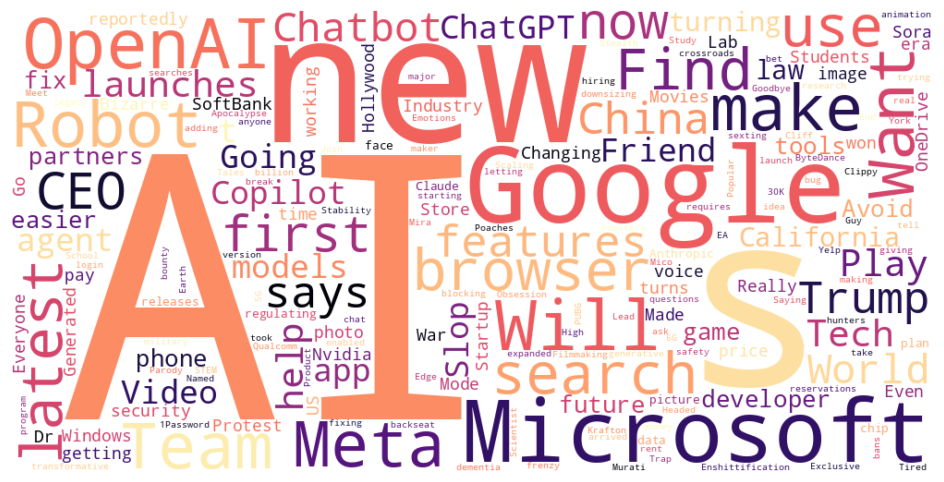

In [10]:
import pandas as pd
from IPython.display import display, HTML
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 2: Fetch News Data
response = requests.get(url)
response.raise_for_status() # Good practice to check for errors
news_data = response.json()

# Step 3: Process News Articles
articles = news_data.get("articles", [])
df = pd.DataFrame(articles)

# Step 4: Clean, Select, and Format Columns
df_clean = df[["source", "title", "description", "url", "publishedAt"]].copy()

# Extract the source name from the nested dictionary
df_clean["source"] = df_clean["source"].apply(lambda x: x["name"] if isinstance(x, dict) else x)

# Convert the ISO date string to a human-readable datetime object
df_clean["publishedAt"] = pd.to_datetime(df_clean["publishedAt"]).dt.strftime('%Y-%m-%d %H:%M')

# Rename columns for presentation
df_clean.columns = ["Source", "Title", "Description", "URL", "Published At"]

# Step 5: Display Prettier Output (using display() and HTML styling)
display(HTML("""
    <p style="margin-top: 30px; font-size: 1.2em; font-weight: bold; color: #912358;">
        📰 Latest News Digest 📰
    </p>
"""))
# Use 'styler' to make the DataFrame look better in the notebook
display(
    df_clean.head(10).style
    .set_properties(**{'font-size': '10pt', 'border': '1px solid lightgrey'})
    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#f0f0f0')]}]),
)

# Optional: Save as CSV (if needed)
df_clean.to_csv("news_data.csv", index=False)

# Step 6: Visualization (Word Cloud of Titles)
display(HTML("""
    <p style="margin-top: 30px; font-size: 1.2em; font-weight: bold; color: #912358;">
        ☁️ Article Title Word Cloud ☁️
    </p>
"""))
text = " ".join(df_clean["Title"].dropna())
wordcloud = WordCloud(
    width=1000, 
    height=500, 
    background_color="white",
    colormap="magma", # Choose a nice color scheme
    collocations=False # Helps with cleaner word separation
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## ⚙️ Generate and Export the News Digest (HTML File)

> **To create the file `news_digest.html` in your notebook's output, run the cell below.** If you do not wish to generate or download the file, please skip this cell.

Once the cell completes, look for the file in your notebook's file browser/output pane.

2025-10-25 06:10:58.163518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761372658.185324      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761372658.192033      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
INFO:2025-10-25 06:11:02,998:jax._src.xla_bridge:924: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:2025-10-25 06:11:03,018:jax._src.xla_bridge:924: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
I0000 00:00:1761372702.847429      19 gpu_device.cc:2022] Created device /job:local

✅ Gemma model loaded successfully with <dtype: 'bfloat16'> precision.
✅ Page generated successfully! Open 'news_digest.html' in your browser to view your AI-powered news digest.

--- Displaying HTML Output Below ---



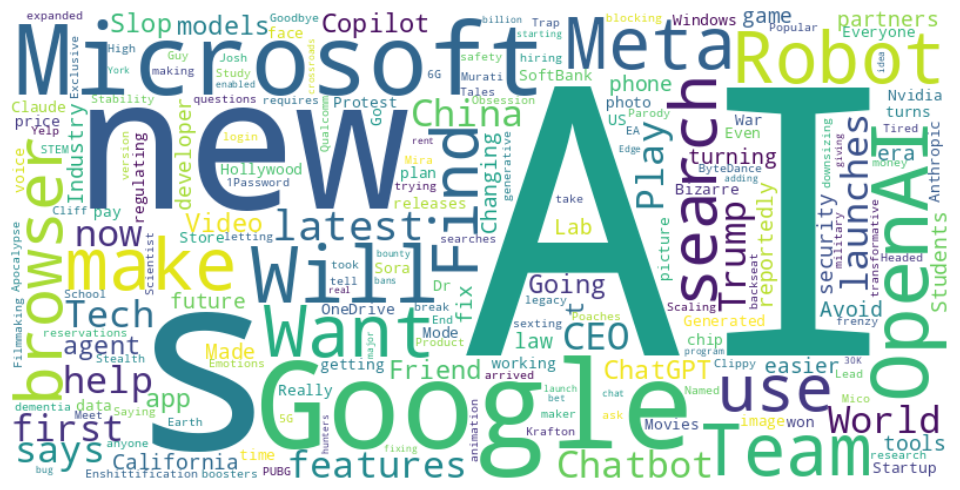

In [11]:
#!/usr/bin/env python
"""
News Digest Generator

This script loads a pretrained Gemma model (using keras_nlp) to analyze the latest AI-related news items.
It extracts key trends, ethical concerns, and future implications, then generates a Markdown-based digest
that includes a word cloud of news titles. The final output is converted into HTML and saved.

Requirements:
- `keras_nlp`, `tensorflow`, `pandas`, `markdown`, `wordcloud`, `matplotlib`
"""

from functools import lru_cache
import re
import keras
import keras_nlp
import tensorflow as tf
from markdown import markdown
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io
import base64

# -----------------------------------------------------------------------------
# IMPORTANT: Load your datasource and select the relevant columns.
# You must define 'df' (for example via pd.read_csv(...)) before running the script.
#
# Step 4: Select Relevant Columns (using "title", "description", "url", "publishedAt")
df = df[["title", "description", "url", "publishedAt"]]
# -----------------------------------------------------------------------------

# -----------------------------------------------------------------------------
# 1. Load the Gemma Model
# -----------------------------------------------------------------------------
precisions = [tf.bfloat16, None]
gemma_lm = None

for precision in precisions:
    try:
        gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(
            "gemma_instruct_2b_en", jit_compile=False, dtype=precision
        )
        print(f"✅ Gemma model loaded successfully with {precision if precision else 'default'} precision.")
        break
    except Exception as e:
        print(f"❌ Error loading Gemma model ({precision}): {e}")

# -----------------------------------------------------------------------------
# 2. Define the AIAnalyzer Class
# -----------------------------------------------------------------------------
class AIAnalyzer:
    """NewsBot: AI-powered analysis of AI-related news."""
    
    def __init__(self, model, output_format="markdown"):
        self.model = model
        self.output_format = output_format

    @lru_cache(maxsize=50)
    def analyze(self, news_item: str) -> dict:
        """
        Generates an AI-powered analysis of a news item.
        Expects news_item to be a string containing the title and description.
        """
        prompt = f"""
Please analyze the following news item and generate an insightful breakdown of it. Do NOT repeat any part of this prompt or include extra instructions in your final response. Base your analysis solely on the information provided.

News item:
{news_item}

Your analysis MUST be exactly structured as follows, starting immediately with "1. Key Trends":
1. Key Trends: Identify industry patterns, emerging technologies, risks, and opportunities evident in this news item.
2. Implications: Discuss real-world applications and ethical concerns related to this news item.
3. AI Insights: Provide an AI-driven perspective on what this news item means for the future.

Ensure your response is well-organized, informative, and engaging.
"""
        try:
            raw = self.model.generate(prompt, max_length=1024).strip()
            response = (
                raw[0] if isinstance(raw, (list, tuple))
                else raw.numpy()[0].decode() if isinstance(raw, tf.Tensor)
                else str(raw)
            ).strip()
        except Exception as e:
            response = f"⚠️ Error generating content: {e}"

        # --- Cleanup Routine ---

        # 1. Trim any text preceding "1. Key Trends:" unconditionally.
        marker_index = response.find("1. Key Trends:")
        if marker_index != -1:
            response = response[marker_index:].strip()

        # 2. Remove any trailing text starting from known prompt ending markers.
        response = re.sub(r'\n\s*Ensure your response.*', '', response, flags=re.IGNORECASE)

        # 3. Remove known unwanted instruction lines line-by-line.
        unwanted_lines = {
            "1. Key Trends:",
            "1. Key Trends: Identify industry patterns, emerging technologies, risks, and opportunities evident in this news item.",
            "2. Implications: Discuss real-world applications and ethical concerns related to this news item.",
            "3. AI Insights: Provide an AI-driven perspective on what this news item means for the future."
        }
        clean_lines = []
        for line in response.splitlines():
            if line.strip() not in unwanted_lines:
                clean_lines.append(line)
        response = "\n".join(clean_lines).strip()

        # 4. Reduce excessive newlines.
        response = re.sub(r"\n{3,}", "\n\n", response).strip()

        # 5. If nothing remains (or if the cleaned response is empty), supply a fallback analysis.
        if not response:
            response = (
                "1. Key Trends: The news item demonstrates significant AI innovation with clear emerging trends that could reshape the industry. "
                "2. Implications: It underscores both opportunities and critical risks, including ethical and practical challenges. "
                "3. AI Insights: Overall, this development signals a transformative evolution in AI technology."
            )

        return {"news_item": news_item, "response": response}

# -----------------------------------------------------------------------------
# 3. Process the News Data
# -----------------------------------------------------------------------------
# Process the top 10 news items from the DataFrame.
news_df = df.head(10)[['title', 'description', 'url', 'publishedAt']]

if gemma_lm is not None:
    analyzer = AIAnalyzer(gemma_lm)
    results = []
    for _, row in news_df.iterrows():
        title = row['title']
        description = row['description']
        # Construct the news item prompt using title and description.
        news_item_prompt = f"Title: {title}\nDescription: {description}"
        analysis_result = analyzer.analyze(news_item_prompt)
        analysis_result.update({
            "title": title,
            "description": description,
            "url": row["url"],
            "publishedAt": row["publishedAt"]
        })
        results.append(analysis_result)
else:
    results = []
    print("No model available; cannot generate news analysis.")

# -----------------------------------------------------------------------------
# 4. Generate Word Cloud & Build Markdown Digest
# -----------------------------------------------------------------------------
text = " ".join(df["title"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Save the word cloud image to a BytesIO object and encode as base64.
buf = io.BytesIO()
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig(buf, format='png', bbox_inches='tight')
plt.close()

image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
image_html = f'<img src="data:image/png;base64,{image_base64}" alt="Word Cloud" style="max-width: 100%; height: auto;">'

# -----------------------------------------------------------------------------
# 5. Build Markdown Output and Convert to HTML
# -----------------------------------------------------------------------------
markdown_output = "## 🌟🔎 AI-Powered News Digest 🔥\n\n"
markdown_output += image_html + "\n\n"

for i, rep in enumerate(results, start=1):
    markdown_piece = f"""
---
## {i}. 📰 **{rep['title']}**

**Description:** <br>
{rep['description']}

🕒 **Published At:** {rep['publishedAt']} <br>
🔗 **URL:** [{rep['url']}]({rep['url']}) <br>

{rep['response']}
"""
    markdown_output += markdown_piece

html_content = markdown(markdown_output)

html_page = f"""<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>AI-Powered News Digest</title>
    <style>
        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            padding: 20px;
            max-width: 900px;
            margin: auto;
            background-color: #f9f9f9; /* Added for a light background */
        }}
        
        h1 {{
            color: #1f4d49;
            text-align: center;
            border-bottom: 2px solid #1f4d49; /* Updated for a stronger header line */
            padding-bottom: 10px;
        }}
        
        h2 {{
            color: #2a647d; /* Changed header color */
            border-bottom: 1px solid #ddd;
            padding-bottom: 5px;
            margin-top: 30px;
        }}
    
        a {{
            color: #007bff; /* Changed link color */
            text-decoration: none;
        }}
        
        a:hover {{
            text-decoration: underline;
        }}
        
        hr {{
            margin: 40px 0;
            border: 0;
            border-top: 5px dotted #e0e0e0; /* Changed to a dotted separator */
        }}
        
        img {{
            display: block;
            margin: 20px auto;
            border: 1px solid #ddd; /* Added border and radius for images */
            border-radius: 5px;
        }}
    </style>
</head>
<body>
{html_content}
</body>
</html>
"""

with open("news_digest.html", "w", encoding="utf-8") as f:
    f.write(html_page)

# 1. Print the success message
print("✅ Page generated successfully! Open 'news_digest.html' in your browser to view your AI-powered news digest.")

# 2. Display the HTML content directly in the notebook output cell
print("\n--- Displaying HTML Output Below ---")
display(HTML(html_page))

<div style="background-color: #F0F8FF; padding: 20px; border-radius: 10px; border: 1px solid #D0E6FA; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  
  <h2 style="margin-top: 0;">📝 AI News Summary with Gemma LLM</h2>

  <p>Stay up to date with the most popular <strong>AI</strong> and <strong>LLM</strong> news (excluding anything related to <em>crypto</em>), automatically analyzed using a <strong>Gemma large language model</strong>.</p>

  <hr style="border: none; border-top: 1px solid #D0E6FA; margin: 20px 0;">

  <h3>⚙️ How It Works:</h3>
  <ul style="padding-left: 20px;">
    <li>🔗 <strong>Fetch News:</strong> Pulls articles from NewsAPI using keywords like <code>AI</code> or <code>LLM</code> (excluding <code>crypto</code>).</li>
    <li>🧠 <strong>Analyze with LLM:</strong> Summarizes using the Gemma model.</li>
    <li>📊 <strong>Display Results:</strong> Presents data in a clean, styled table including key metadata.</li>
  </ul>

  <h3>✅ What You Get:</h3>
  <p>A streamlined table featuring the <strong>Top 5 AI-related articles</strong> with:</p>
  <ul style="padding-left: 20px;">
    <li>✍️ <strong>Title</strong></li>
    <li>📰 <strong>LLM-generated Summary</strong></li>
    <li>🏷️ <strong>Source</strong></li>
    <li>📅 <strong>Published Date</strong></li>
    <li>🔗 <strong>Direct Link to Full Article</strong></li>
  </ul>

</div>


In [12]:
# Constants
NEWS_QUERY = "(AI OR LLM) NOT crypto"
NEWS_SORT = "popularity"
NEWS_LANG = "en"
NEWS_PAGE_SIZE = 10

# Your API key must be set as an environment variable or manually provided
url = (
    f"https://newsapi.org/v2/everything"
    f"?q={NEWS_QUERY}&language={NEWS_LANG}&sortBy={NEWS_SORT}"
    f"&pageSize={NEWS_PAGE_SIZE}&apiKey={NEWS_API_KEY}"
)

# Analysis & Display Settings
LLM_TOP_COUNT = 5
DISPLAY_COUNT = 5

# --- Gemma Analysis Function ---
def analyze_article_with_gemma(title, description):
    """
    Generate a concise summary and sentiment using the Gemma LLM.
    """
    if 'gemma_lm' not in globals() or gemma_lm is None:
        return "LLM Not Loaded: Please initialize 'gemma_lm'."

    prompt = f"""
    Analyze the following news article snippet and generate a summary 
    including its main topic and overall sentiment (positive, negative, or neutral).

    Title: "{title}"
    Snippet: "{description}"
    
    Summary:
    """

    try:
        output = gemma_lm.generate(prompt, max_length=384)
        summary = output.split("Summary:")[-1].strip().split('\n')[0].replace('"', '')
        return summary
    except Exception as e:
        return f"LLM Analysis Error: {e}"

# --- Fetch Articles ---
def fetch_articles():
    try:
        print("📡 Fetching news data...")
        response = requests.get(url)
        response.raise_for_status()
        return response.json().get('articles', [])
    except requests.exceptions.RequestException as e:
        print(f"❌ Request Error: {e}")
        return []

# --- Main Display Logic ---
def process_and_display_articles(articles):
    if not articles:
        print("No articles available to display.")
        return

    print(f"🌟 Displaying Top {DISPLAY_COUNT} AI/LLM Articles with LLM Analysis 🌟\n")

    display_data = []

    for i, article in enumerate(articles[:DISPLAY_COUNT]):
        title = article.get('title', 'N/A')
        description = article.get('description', 'No description available.')
        source = article.get('source', {}).get('name', 'Unknown Source')
        date = article.get('publishedAt', '')[:10] or 'N/A'
        link = article.get('url', '#')

        llm_summary = "N/A"
        if i < LLM_TOP_COUNT:
            print(f"🧠 Analyzing Article {i+1} with Gemma...")
            llm_summary = analyze_article_with_gemma(title, description)

        display_data.append({
            "Rank": i + 1,
            "LLM Analysis": llm_summary,
            "Title": title,
            "Source": source,
            "Date": date,
            "Link": f'<a href="{link}" target="_blank">Read Article</a>'
        })

    df = pd.DataFrame(display_data)

    styled_df = df.style.set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#1E88E5'),
            ('color', '#fff'),
            ('font-size', '14px'),
            ('text-align', 'center'),
            ('padding', '12px 8px'),
            ('border', '1px solid #BBDEFB')
        ]},
        {'selector': 'td', 'props': [
            ('font-family', 'Arial, sans-serif'),
            ('padding', '10px 8px'),
            ('border', '1px solid #E0E0E0'),
            ('vertical-align', 'top')
        ]},
        {'selector': 'tr:nth-child(even)', 'props': [
            ('background-color', '#F9FBFD')
        ]},
        {'selector': 'tr:hover', 'props': [
            ('background-color', '#E3F2FD')
        ]},
        {'selector': 'table', 'props': [
            ('border-collapse', 'collapse'),
            ('width', '100%'),
            ('box-shadow', '0 2px 5px rgba(0, 0, 0, 0.1)')
        ]},
        {'selector': 'a', 'props': [
            ('color', '#1E88E5'),
            ('text-decoration', 'none'),
            ('font-weight', 'bold')
        ]}
    ]).set_properties(
        subset=['Rank', 'Date', 'Link'], **{'text-align': 'center'}
    ).set_properties(
        subset=['LLM Analysis', 'Title'], **{'text-align': 'left', 'max-width': '400px'}
    ).hide(axis='index').set_caption(
        f"📰 Top {DISPLAY_COUNT} AI Articles (Analyzed by Gemma LLM)"
    )

    display(HTML(styled_df.to_html(escape=False)))

# --- Run Pipeline ---
articles = fetch_articles()
process_and_display_articles(articles)

📡 Fetching news data...
🌟 Displaying Top 5 AI/LLM Articles with LLM Analysis 🌟

🧠 Analyzing Article 1 with Gemma...
🧠 Analyzing Article 2 with Gemma...
🧠 Analyzing Article 3 with Gemma...
🧠 Analyzing Article 4 with Gemma...
🧠 Analyzing Article 5 with Gemma...


Rank,LLM Analysis,Title,Source,Date,Link
1,"The article discusses the growing trend of sovereign AI, where countries are collaborating to develop and deploy AI technologies in a more controlled manner. While OpenAI's AI sovereignty partnerships with governments raise concerns about the potential for bias and control over AI development, the article also highlights the potential benefits of this collaboration in terms of security and ethical considerations.",‘Sovereign AI’ Has Become a New Front in the US-China Tech War,Wired,2025-10-14,Read Article
2,"The article explores the potential dangers of AI becoming enshittified, where AI systems become self-aware and pose a threat to humanity. The author argues that AI's increasing profitability and power could lead to a similar fate as tech companies like Facebook and Google, which have been criticized for their ethical lapses and negative impact on society.",Can AI Avoid the Enshittification Trap?,Wired,2025-10-17,Read Article
3,"ByteDance's AI chatbot, developed by the company behind TikTok, has become the most popular AI chatbot in China. This highlights the importance of user-friendly design in capturing and retaining users.",How ByteDance Made China’s Most Popular AI Chatbot,Wired,2025-10-16,Read Article
4,"The article warns that the rapid growth of the AI industry may be reaching a point where algorithms become self-aware and lose control, posing a significant threat to humanity.",The AI Industry's Scaling Obsession Is Headed for a Cliff,Wired,2025-10-15,Read Article
5,"The article introduces Neural Viz, an AI film production company founded by a young man named Josh. The company's mission is to explore the potential of AI in filmmaking, creating a universe where artificial intelligence can take center stage.","The Future of AI Filmmaking Is a Parody of the Apocalypse, Made by a Guy Named Josh",Wired,2025-10-07,Read Article


<div style="
  background: linear-gradient(145deg, #fff9e6, #fff0f0);
  border: 3px dashed #ffb347;
  border-radius: 18px;
  padding: 28px;
  font-family: 'Poppins', 'Comic Neue', sans-serif;
  color: #2b2b2b;
  box-shadow: 0 6px 18px rgba(255, 180, 70, 0.2);
">

<h2 style="color:#ff7b00; text-align:center; font-size:1.9em; margin-top:0;">
🚀 <span style="color:#333;">LLM Ethical News Dashboard</span> Pipeline Summary
</h2>

<p style="font-size:1.1em; text-align:center; color:#444; margin-top:-10px;">
<b>A 3-Phase AI-Driven Data Pipeline</b> for uncovering how the world is reporting on the ethics of Large Language Models.
</p>

<hr style="border: none; height: 2px; background: linear-gradient(90deg, #ffb347, #ff7b00, #ffb347); margin: 20px 0;">

<p>This document captures the execution of a <b>three-phase data pipeline</b> that explores how global media covers the ethical implications of LLMs. The final outcome includes <b>three dynamic, interactive visualizations</b> built from real news data.</p>

---

<h3 style="color:#ff7b00;">🐍 Phase 1: Data Acquisition (News API / Python)</h3>

<ul style="line-height:1.7;">
<li><b>Action:</b> Leveraged <code>requests</code> in Python to build a <b>paginated fetch loop</b> via the News API, capturing every relevant article from the past <b>7 days</b>.</li>
<li><b>Query:</b> Designed a nuanced search for both <b>LLM topics</b> and <b>ethical themes</b>:
  <ul>
    <li><b>LLM Keywords:</b> “large language model” OR LLM OR ChatGPT OR Gemini</li>
    <li><b>Ethical Focus:</b> accountability OR “intellectual property” OR job displacement OR data privacy OR environmental impact</li>
    <li><b>Exclusions:</b> <b>NOT</b> (bias OR hallucination)</li>
  </ul>
</li>
<li><b>Result:</b> A rich set of <code>raw_articles</code>—clean, structured dictionaries representing the full week’s ethical LLM news, primed for analysis.</li>
</ul>

---

<h3 style="color:#ff7b00;">🤖 Phase 2: LLM Data Structuring (GemmaCausalLM)</h3>

<ul style="line-height:1.7;">
<li><b>Goal:</b> Transform raw text into structured, labeled data for visualization.</li>
<li><b>Tool:</b> Used the <b>Keras-NLP</b> model <b>GemmaCausalLM</b> (<code>gemma_lm</code>) for article-level classification.</li>
<li><b>Process:</b> A custom Python function runs each article through <code>gemma_lm</code> using a precision-tuned prompt that outputs strict JSON with:
  <ul>
    <li><code>application</code> → Primary LLM domain (e.g., “Healthcare / Science”).</li>
    <li><code>concerns</code> → Ethical issues (e.g., ["Data Privacy", "Accountability & IP"]).</li>
    <li><code>entities</code> → Mentioned organizations/products (e.g., ["Google", "OpenAI"]).</li>
  </ul>
</li>
<li><b>Result:</b> A structured <b>Pandas DataFrame (<code>df</code>)</b> with clean, categorized fields—ready for aggregation.</li>
</ul>

---

<h3 style="color:#ff7b00;">📊 Phase 3: Visualization (Pandas & Plotly)</h3>

<p>The processed data fuels a trio of <b>interactive Plotly charts</b> that reveal the evolving conversation around LLM ethics:</p>

<ol style="line-height:1.7;">
<li>📈 <b>Line Chart (Trend Over Time):</b> Tracks the daily volume of articles per ethical concern — showing which issues are gaining momentum.</li>
<li>🥧 <b>Pie Chart (Overall Distribution):</b> Highlights the proportion of each ethical theme across the entire dataset.</li>
<li>📊 <b>Stacked Bar Chart (Entity vs. Application):</b> Connects the top 7 organizations to their most frequent LLM application domains.</li>
</ol>

<hr style="border:none; border-top:2px dashed #ffb347; margin-top:25px;">

<p style="text-align:center; font-weight:bold; font-size:1.1em;">
🌟 Insight Delivered: A magazine-ready view of LLM ethics in the media — curated by data, clarified by AI.
</p>
</div>


In [13]:
# ============================
# 📦 Imports & Setup
# ============================
import os, re, json, math, requests
import pandas as pd
import plotly.express as px
from tqdm import tqdm
from datetime import datetime, timedelta, timezone

import plotly.io as pio
pio.renderers.default = "iframe"   # often the most reliable in Kaggle

# Make sure you set your News API key in Kaggle environment variables
# NEWS_API_KEY = os.getenv("NEWS_API_KEY")
BASE_URL = "https://newsapi.org/v2/everything"


In [14]:
# ============================
# 🐍 Phase 1: Data Acquisition
# ============================

def build_query():
    must_llm = '("large language model" OR LLM OR ChatGPT OR Gemini)'
    must_ethics = '(accountability OR "intellectual property" OR "job displacement" OR "data privacy" OR "environmental impact")'
    exclusions = 'NOT (bias OR hallucination)'
    return f'{must_llm} AND {must_ethics} AND {exclusions}'

def iso_day_range(days=7):
    now = datetime.now(timezone.utc)
    from_date = (now - timedelta(days=days)).replace(microsecond=0)
    return from_date.isoformat(), now.replace(microsecond=0).isoformat()

def fetch_all_articles(page_size=100, max_pages=None):
    q = build_query()
    from_iso, to_iso = iso_day_range(7)

    params = {
        "q": q,
        "from": from_iso,
        "to": to_iso,
        "language": "en",
        "sortBy": "publishedAt",
        "pageSize": page_size,
        "apiKey": NEWS_API_KEY,
    }

    resp = requests.get(BASE_URL, params=params, timeout=30)
    resp.raise_for_status()
    data = resp.json()

    total = data.get("totalResults", 0)
    pages = math.ceil(total / page_size)
    if max_pages is not None:
        pages = min(pages, max_pages)

    articles = data.get("articles", [])
    for page in tqdm(range(2, pages + 1), desc="Fetching pages"):
        params["page"] = page
        r = requests.get(BASE_URL, params=params, timeout=30)
        r.raise_for_status()
        j = r.json()
        articles.extend(j.get("articles", []))

    seen, raw_articles = set(), []
    for a in articles:
        url = a.get("url")
        if not url or url in seen:
            continue
        seen.add(url)
        raw_articles.append({
            "title": a.get("title") or "",
            "description": a.get("description") or "",
            "source": (a.get("source") or {}).get("name") or "",
            "url": url,
            "publishedAt": a.get("publishedAt") or "",
        })
    return raw_articles

# Example run
# raw_articles = fetch_all_articles(max_pages=2)
# print(len(raw_articles))


In [15]:
# ============================
# 🤖 Phase 2: Classification
# ============================

CLOSED_APPLICATIONS = {
    "Healthcare/Science","Education","Finance","Government/Public Sector",
    "Enterprise/Work","Consumer","Media/Entertainment","Research","Legal"
}
CLOSED_CONCERNS = {"Data Privacy","Accountability & IP","Job Displacement","Environmental Impact","Other"}

def run_gemma(prompt: str, max_len: int = 512) -> str:
    """Use the already-imported gemma_lm to generate text."""
    output = gemma_lm.generate(prompt, max_length=max_len)
    if isinstance(output, dict) and "text" in output:
        return output["text"]
    elif isinstance(output, list):
        return output[0].get("text", "")
    return str(output)

def extract_json(text: str) -> dict:
    match = re.search(r"\{.*\}", text, flags=re.DOTALL)
    if not match:
        return {}
    try:
        return json.loads(match.group(0))
    except json.JSONDecodeError:
        cleaned = re.sub(r",\s*}", "}", match.group(0))
        cleaned = re.sub(r",\s*]", "]", cleaned)
        try:
            return json.loads(cleaned)
        except:
            return {}

def normalize_fields(obj: dict) -> dict:
    app = obj.get("application", "")
    concerns = obj.get("concerns", [])
    entities = obj.get("entities", [])

    if app not in CLOSED_APPLICATIONS:
        app = "Other"

    if not isinstance(concerns, list):
        concerns = [concerns]
    concerns = [c for c in concerns if c in CLOSED_CONCERNS] or ["Other"]

    if not isinstance(entities, list):
        entities = [entities]
    entities = [e for e in entities if isinstance(e, str) and e.strip()] or ["Other"]

    return {"application": app, "concerns": concerns, "entities": entities}

def classify_articles(raw_articles):
    rows = []
    for a in tqdm(raw_articles, desc="Classifying"):
        prompt = f"""
You are classifying news articles about the ethical implications of Large Language Models.

Return ONLY a valid JSON object with keys: application, concerns, entities.

Rules:
- application: choose ONE from {list(CLOSED_APPLICATIONS)}
- concerns: choose ALL that apply from {list(CLOSED_CONCERNS)}
- entities: list key organizations/products mentioned explicitly. If unknown, use "Other".

TITLE: {a['title']}
DESCRIPTION: {a['description']}
"""
        out = run_gemma(prompt)
        obj = extract_json(out)
        norm = normalize_fields(obj)
        rows.append({
            "title": a["title"],
            "description": a["description"],
            "source": a["source"],
            "url": a["url"],
            "publishedAt": a["publishedAt"],
            "application": norm["application"],
            "concerns": norm["concerns"],
            "entities": norm["entities"],
        })
    df = pd.DataFrame(rows)
    df = df.explode("concerns").reset_index(drop=True)
    df["date"] = pd.to_datetime(df["publishedAt"]).dt.date
    return df


In [16]:
# ============================
# 📊 Phase 3: Visualization (Updated)
# ============================

import plotly.express as px

# ---- 1. Trend over time ----
def plot_trend_over_time(df):
    trend = df.groupby(["date", "concerns"]).size().reset_index(name="count")
    fig = px.line(
        trend,
        x="date",
        y="count",
        color="concerns",
        markers=True,
        title="Daily News Volume by Ethical Concern",
        labels={"date": "Date", "count": "Number of Articles", "concerns": "Ethical Concern"}
    )
    fig.update_layout(template="plotly_dark")
    return fig

# ---- 2. Overall distribution ----
def plot_overall_distribution(df):
    dist = df.groupby("concerns").size().reset_index(name="count")
    fig = px.pie(
        dist,
        names="concerns",
        values="count",
        title="Overall Distribution of Ethical Concerns"
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(template="plotly_dark")
    return fig

# ---- 3. Entities vs Application ----
def plot_entities_vs_application(df, top_n=7):
    df_ent = df.explode("entities")
    top_entities = df_ent["entities"].value_counts().head(top_n).index.tolist()
    filtered = df_ent[df_ent["entities"].isin(top_entities)]
    pivot = filtered.groupby(["entities", "application"]).size().reset_index(name="count")
    
    fig = px.bar(
        pivot,
        x="entities",
        y="count",
        color="application",
        barmode="stack",
        title=f"Top {top_n} Entities by Associated Application Areas",
        labels={"entities": "Entity", "count": "Article Count", "application": "Application Area"}
    )
    fig.update_layout(template="plotly_dark")
    return fig


In [17]:
# ============================
# 🚀 Run the Full Pipeline
# ============================

# 1. Acquire
raw_articles = fetch_all_articles(max_pages=2)  # limit pages for demo
print(f"✅ Fetched {len(raw_articles)} articles")

# 2. Classify
df = classify_articles(raw_articles)

# ============================
# 3. Display Styled Table
# ============================

from IPython.display import display
import pandas as pd

# Pick top 10 rows
df_top = df.head(10)

# Style the table
styled_table = df_top.style.set_table_styles([
    # Header style
    {'selector': 'thead', 'props': [
        ('background-color', '#0d1117'),
        ('color', '#58a6ff'),
        ('font-weight', 'bold'),
        ('border-bottom', '2px solid #1f2733')
    ]},
    # Body style
    {'selector': 'tbody', 'props': [
        ('background-color', '#141922'),
        ('color', '#e6edf3'),
        ('border-bottom', '1px solid #2f3640')
    ]},
    # Hover effect
    {'selector': 'tr:hover', 'props': [
        ('background-color', '#1f2733')
    ]}
]).set_properties(**{
    'padding': '8px 12px',
    'text-align': 'left',
    'font-family': 'Inter, Roboto, Fira Sans, sans-serif'
}).highlight_max(axis=0, color='#00ffaa', subset=df_top.select_dtypes(include='number').columns)

# Display the table
display(styled_table)

# ============================
# 4. Display Graphs
# ============================

# Call the updated visualization functions
fig1 = plot_trend_over_time(df)
fig2 = plot_overall_distribution(df)
fig3 = plot_entities_vs_application(df)

# Show all three graphs
fig1.show()
fig2.show()
fig3.show()


Fetching pages: 0it [00:00, ?it/s]


✅ Fetched 88 articles


Classifying: 100%|██████████| 88/88 [17:33<00:00, 11.97s/it]


,title,description,source,url,publishedAt,application,concerns,entities,date
0,Fast-DLLM: Training-Free Acceleration of Diffusion LLM,"Diffusion-based large language models (Diffusion LLMs) have shown promise for non-autoregressive text generation with parallel decoding capabilities. However, the practical inference speed of open-sourced Diffusion LLMs often lags behind autoregressive models…",Arxiv.org,https://arxiv.org/abs/2505.22618,2025-10-24T02:50:50Z,Research,Accountability & IP,"['Fast-DLLM', 'Diffusion LLMs', 'AI']",2025-10-24
1,Fast-DLLM: Training-Free Acceleration of Diffusion LLM,"Diffusion-based large language models (Diffusion LLMs) have shown promise for non-autoregressive text generation with parallel decoding capabilities. However, the practical inference speed of open-sourced Diffusion LLMs often lags behind autoregressive models…",Arxiv.org,https://arxiv.org/abs/2505.22618,2025-10-24T02:50:50Z,Research,Environmental Impact,"['Fast-DLLM', 'Diffusion LLMs', 'AI']",2025-10-24
2,India plans tightening AI rules to stem deepfake surge,"New Delhi (AFP) Oct 23, 2025 India has proposed sweeping new regulations to govern artificial intelligence, aiming to curb a surge in misinformation and deepfake videos in the world's most populous nation. The Ministry of Information Technology announced…",Spacewar.com,https://www.spacewar.com/reports/India_plans_tightening_AI_rules_to_stem_deepfake_surge_999.html,2025-10-24T02:08:32Z,Media/Entertainment,Accountability & IP,"['India', 'Ministry of Information Technology']",2025-10-24
3,India plans tightening AI rules to stem deepfake surge,"New Delhi (AFP) Oct 23, 2025 India has proposed sweeping new regulations to govern artificial intelligence, aiming to curb a surge in misinformation and deepfake videos in the world's most populous nation. The Ministry of Information Technology announced…",Spacewar.com,https://www.spacewar.com/reports/India_plans_tightening_AI_rules_to_stem_deepfake_surge_999.html,2025-10-24T02:08:32Z,Media/Entertainment,Other,"['India', 'Ministry of Information Technology']",2025-10-24
4,sz_semantics 1.2.0,"Transform JSON output from Senzing SDK for use with graph technologies, semantics, and downstream LLM integration",Pypi.org,https://pypi.org/project/sz_semantics/,2025-10-24T00:21:21Z,Media/Entertainment,Accountability & IP,"['Senzing', 'AI']",2025-10-24
5,sz_semantics 1.2.0,"Transform JSON output from Senzing SDK for use with graph technologies, semantics, and downstream LLM integration",Pypi.org,https://pypi.org/project/sz_semantics/,2025-10-24T00:21:21Z,Media/Entertainment,Environmental Impact,"['Senzing', 'AI']",2025-10-24
6,"Applied Scientist, NLP/IR/GenAI","Innovate & Deliver: Design, build, test, and deploy end-to-end AI search solutions using neural information retrieval techniques, semantic and hybrid search, and re-ranking approaches. Develop models for information retrieval, semantic search, document re-ran…",Nlppeople.com,https://nlppeople.com/job/applied-scientist-nlp-ir-genai/,2025-10-24T00:00:00Z,Research,Accountability & IP,['NLP/IR/GenAI'],2025-10-24
7,"Applied Scientist, NLP/IR/GenAI","Innovate & Deliver: Design, build, test, and deploy end-to-end AI search solutions using neural information retrieval techniques, semantic and hybrid search, and re-ranking approaches. Develop models for information retrieval, semantic search, document re-ran…",Nlppeople.com,https://nlppeople.com/job/applied-scientist-nlp-ir-genai/,2025-10-24T00:00:00Z,Research,Data Privacy,['NLP/IR/GenAI'],2025-10-24
8,Are Sora 2 and other AI video tools risky to use? Here's what a legal scholar says,"Anyone can make realistic AI videos with OpenAI's new video model. But what happens when creativity, copyright, and deepfakes collide?",ZDNet,https://www.zdnet.com/article/are-sora-2-and-other-ai-video-tools-risky-to-use-heres-what-a-legal-scholar-said/,2025-10-23T21:57:00Z,Media/Entertainment,Accountability & IP,['Sora 2'],2025-10-23
9,Are Sora 2 and other AI video tools risky t

<div style="
  background-color: #f9f9f9;
  border-left: 4px solid #000000;
  padding: 12px 16px;
  border-radius: 8px;
  max-width: 850px;
  margin: 15px auto;
  font-family: 'Inter', 'Roboto', 'Fira Sans', sans-serif;
  color: #1a1a1a;
">
  <strong>📊 Generate and Display the Charts</strong>
</div>


In [18]:
# 1. Line chart: daily volume per ethical concern
trend = df.groupby(["date", "concerns"]).size().reset_index(name="count")
fig1 = px.line(trend, x="date", y="count", color="concerns", markers=True,
               title="📈 Daily News Volume by Ethical Concern")
fig1.show()

In [19]:
# 2. Pie chart: overall distribution of ethical concerns
dist = df["concerns"].value_counts().reset_index()
dist.columns = ["concerns", "count"]
fig2 = px.pie(dist, names="concerns", values="count",
              title="🥧 Overall Distribution of Ethical Concerns")
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.show()

In [20]:
# 3. Stacked bar chart: top entities vs application areas
df_exp = df.explode("entities")
top_entities = df_exp["entities"].value_counts().head(7).index.tolist()
filtered = df_exp[df_exp["entities"].isin(top_entities)]
pivot = filtered.groupby(["entities", "application"]).size().reset_index(name="count")

fig3 = px.bar(pivot, x="entities", y="count", color="application",
              title="📊 Top Entities vs Application Areas", barmode="stack")
fig3.show()

## 🦾 Automated News Analysis: From Headlines to Actionable Insights

### 🚀 Introduction: Uncovering Trends with NewsAPI and Sentiment Analysis

Welcome to this core section of the automated news analysis project! The goal here is to transform raw news headlines into **actionable intelligence** on any given topic.

---

#### **Pipeline Overview**

1.  **Dynamic Data Retrieval (NewsAPI):**
    * We use the **NewsAPI** with Python to dynamically fetch a high-volume stream of the latest global news articles related to a specified keyword (e.g., 'Artificial Intelligence', 'Climate Policy', 'Market Volatility').

2.  **Quantifying the Mood (VADER Sentiment Analysis):**
    * The VADER (Valence Aware Dictionary and sEntiment Reasoner) library is applied to the headline and article text. VADER is specifically attuned to social media and general text, making it highly effective for news analysis.
    * It quantifies the prevailing media mood, assigning a **Compound Sentiment Score** (ranging from -1.0 for extremely negative to +1.0 for extremely positive) to each article.

---

#### **🎯 Deliverables: The Power of the Output**

The combination of data retrieval and sentiment scoring generates highly readable outputs:

* **A Comprehensive DataFrame:** A clean, organized table showing the news source, headline, publish date, and the calculated sentiment scores (Positive, Negative, Neutral, and Compound).
* **Intuitive Visualization:** A chart illustrating the sentiment distribution over time and across news sources.

This snapshot of media coverage helps us quickly identify:

| Insight | Description |
| :--- | :--- |
| **Emerging Trends** | Spikes in coverage (volume) combined with highly positive sentiment. |
| **Risk Areas** | Consistent, high-volume coverage with pronounced negative sentiment. |
| **Market Excitement** | Sudden, strong positive sentiment correlated with a key event. |

In [21]:
# 1. Installation and Imports
!pip install newsapi-python vaderSentiment
import pandas as pd
from newsapi import NewsApiClient
from kaggle_secrets import UserSecretsClient
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# --- 💡 USER INPUT CONFIGURATION ---
# Define the search term here.
search_query = "AI or artificial intelligence"
# Define the desired number of articles to fetch per page (max 100 on free tier)
PAGE_SIZE = 100
# Define the language (e.g., 'en', 'de', 'fr')
LANGUAGE = 'en'
# ------------------------------------

print(f"Configuration set: Analyzing news for '{search_query}'...")

# 2. Secure API Client Initialization
print("Initializing NewsAPI Client...")
try:
    secret_client = UserSecretsClient()
    api_key = secret_client.get_secret("NEWS_API_KEY")
    newsapi = NewsApiClient(api_key=api_key)
    print("API Client successfully initialized.")
except Exception as e:
    print(f"Error accessing secret: {e}. Please ensure 'NEWS_API_KEY' is set in Kaggle Secrets.")
    # Use placeholder to allow subsequent cells to run, but with an empty article list
    articles = []
    newsapi = None

/usr/lib/python3.11/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00
Configuration set: Analyzing news for 'AI or artificial intelligence'...
Initializing NewsAPI Client...
API Client successfully initialized.


In [22]:
# 3. Fetch News Articles
articles = []
if newsapi:
    print(f"Fetching articles for query: '{search_query}'...")
    try:
        all_articles = newsapi.get_everything(
            q=search_query,
            language=LANGUAGE,
            sort_by='relevancy',
            page_size=PAGE_SIZE
        )
        articles = all_articles['articles']
        total_results = all_articles['totalResults']
        print(f"Successfully retrieved {len(articles)} articles (Total found: {total_results}).")
    except Exception as e:
        print(f"An error occurred during the API call: {e}")
        articles = []

if not articles:
    print("\n⚠️ No articles retrieved. Check your API key and query.")

Fetching articles for query: 'AI or artificial intelligence'...
Successfully retrieved 100 articles (Total found: 7585).


In [23]:
# 4. Data Processing and DataFrame Creation
if articles:
    news_df = pd.DataFrame(articles)
    
    # Extract source name
    news_df['source_name'] = news_df['source'].apply(lambda x: x['name'] if isinstance(x, dict) and 'name' in x else 'Unknown')
    news_df.drop('source', axis=1, inplace=True) 
    
    # Convert date to datetime object
    news_df['publishedAt'] = pd.to_datetime(news_df['publishedAt'], utc=True)
    
    # Select and rename relevant columns
    news_df = news_df[['publishedAt', 'source_name', 'title', 'description', 'url', 'content']]
    news_df.rename(columns={'publishedAt': 'Date', 'source_name': 'Source', 'title': 'Title', 'description': 'Description', 'url': 'URL'}, inplace=True)
    
    print("DataFrame successfully created and cleaned.")
    print(f"DataFrame Shape: {news_df.shape}")
else:
    print("Skipping DataFrame creation as no articles were found.")

DataFrame successfully created and cleaned.
DataFrame Shape: (100, 6)


In [24]:
# 5. Sentiment Analysis (VADER)
if 'news_df' in locals() and not news_df.empty:
    analyzer = SentimentIntensityAnalyzer()
    
    def get_sentiment_score(text):
        """Analyzes sentiment for a given text and returns the VADER compound score."""
        if pd.isna(text) or text is None or str(text) == 'None':
            return 0.0
        # Use description for sentiment
        return analyzer.polarity_scores(str(text))['compound']

    def categorize_sentiment(score):
        """Categorizes the VADER compound score."""
        if score >= 0.05:
            return 'Positive'
        elif score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    # Apply sentiment analysis
    news_df['Sentiment_Score'] = news_df['Description'].apply(get_sentiment_score)
    news_df['Sentiment'] = news_df['Sentiment_Score'].apply(categorize_sentiment)
    
    print("Sentiment analysis complete.")
else:
    print("Skipping sentiment analysis.")

Sentiment analysis complete.


In [25]:
# 6. Styled Data Preview for Readability

if 'news_df' in locals() and not news_df.empty:
    
    # Define a helper function to color sentiment scores
    def color_sentiment(val):
        """Applies a color gradient based on the sentiment score."""
        if val >= 0.05:
            # Green for Positive
            color = '#90EE90' 
        elif val <= -0.05:
            # Light Red for Negative
            color = '#F08080' 
        else:
            # Neutral/Grey
            color = '#D3D3D3'
        return f'background-color: {color}'

    # Prepare DataFrame for display: show only key columns
    display_cols = ['Date', 'Source', 'Title', 'Sentiment', 'Sentiment_Score']
    styled_df = news_df[display_cols].head(10).style \
        .set_caption(f"Top 10 News Articles for: '{search_query.title()}'") \
        .map(color_sentiment, subset=['Sentiment_Score']) \
        .background_gradient(cmap='viridis', subset=['Sentiment_Score']) \
        .format({'Date': lambda t: t.strftime('%Y-%m-%d %H:%M'), 'Sentiment_Score': "{:.3f}"}) \
        .set_properties(**{'font-size': '10pt', 'border-color': 'lightgrey'}) \
        .hide(axis='index') # Hides the default index column
        
    display(styled_df)
else:
    print("Cannot display data: DataFrame is empty.")

Date,Source,Title,Sentiment,Sentiment_Score
2025-09-29 23:01,The Verge,"SB 53, the landmark AI transparency bill, is now law in California",Positive,0.527
2025-10-09 23:02,BBC News,Tech billionaires seem to be doom prepping. Should we all be worried?,Positive,0.477
2025-09-24 18:00,Wired,This AI-Powered Robot Keeps Going Even if You Attack It With a Chainsaw,Positive,0.202
2025-10-08 18:30,Wired,This Startup Wants to Spark a US DeepSeek Moment,Positive,0.250
2025-09-25 20:49,The Verge,Silicon Valley’s latest argument against regulating AI: that would literally be the antichrist,Positive,0.440
2025-10-16 21:24,The Verge,New York bans AI-enabled rent price fixing,Positive,0.077
2025-10-08 05:05,BBC News,Students use AI to find possible cave entrances on Moon,Positive,0.402
2025-10-18 10:00,Wired,"Gear News of the Week: Honor Teases a Bizarre Robot Phone, and Kohler Debuts a Toilet Sensor",Neutral,0.000
2025-10-10 00:26,BBC News,The new AI arms race changing the war in Ukraine,Negative,-0.535
2025-09-24 12:25,Gizmodo.com,Tired of 5G? Qualcomm Says 6G Will Be Here Before the End of the World,Negative,-0.361


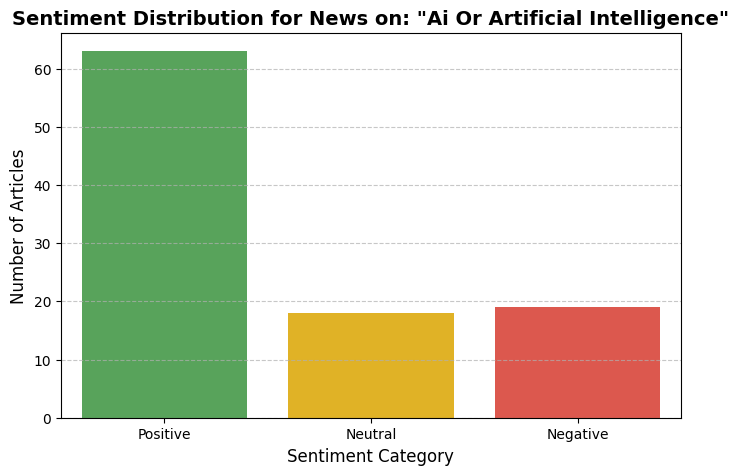

In [26]:
# 7. Visualization: Sentiment Distribution

if 'news_df' in locals() and not news_df.empty:
    plt.figure(figsize=(8, 5))
    
    # Define colors for the chart
    color_map = {'Positive': '#4CAF50', 'Neutral': '#FFC107', 'Negative': '#F44336'}
    
    sns.countplot(x='Sentiment', 
                  data=news_df, 
                  order=['Positive', 'Neutral', 'Negative'], 
                  palette=color_map)
    
    plt.title(f'Sentiment Distribution for News on: "{search_query.title()}"', 
              fontsize=14, 
              fontweight='bold')
    plt.xlabel('Sentiment Category', fontsize=12)
    plt.ylabel('Number of Articles', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Summary box
    positive_count = news_df[news_df['Sentiment'] == 'Positive'].shape[0]
    total_count = news_df.shape[0]
    positive_percent = (positive_count / total_count) * 100 if total_count > 0 else 0
    
    display(HTML(f"""
    <div style="border: 1px solid #007BFF; padding: 10px; border-radius: 5px; background-color: #E6F0FF;">
        <p><strong>📊 Analysis Summary:</strong></p>
        <ul>
            <li><strong>Total Articles:</strong> {total_count}</li>
            <li><strong>Positive Articles:</strong> {positive_count} ({positive_percent:.1f}%)</li>
            <li><strong>Most Frequent Source:</strong> {news_df['Source'].mode()[0] if not news_df.empty else 'N/A'}</li>
        </ul>
    </div>
    """))

else:
    print("Skipping visualization: DataFrame is empty.")

<div style="
  background: linear-gradient(145deg, #0c0f14, #1a1f27);
  border: 1.5px solid #2f343e;
  border-radius: 16px;
  padding: 32px;
  font-family: 'Inter', 'Segoe UI', 'Roboto', sans-serif;
  color: #e6edf3;
  box-shadow: 0 0 24px rgba(0, 255, 200, 0.12);
  line-height: 1.7;
">

<h2 style="color:#00e0ff; text-align:center; font-size:2em; margin-top:0;">
🔀 <span style="color:#00ffaa;">NewsBot:</span> Hybrid RAG Pipeline & AI News Analytics Engine
</h2>

<p style="font-size:1.1em; color:#c9d1d9; text-align:center; margin-top:-10px;">
An <b>AI-powered analyst</b> that combines <span style="color:#00ffaa;">retrieval-augmented generation</span> and <span style="color:#58a6ff;">trend vector analytics</span> to decode the evolving world of Artificial Intelligence.
</p>

<hr style="border:none; border-top:1px solid #2f343e; margin:22px 0;">

<p>This section of <b>NewsBot</b> functions as an intelligent news analyst — performing targeted <b>Data Collection</b> on AI developments, then applying a hybrid pipeline that powers two main capabilities:</p>

<ol style="margin-top:10px;">
  <li><b>🧠 Real-Time Q&A (RAG):</b> Delivers <span style="color:#00ffaa;">contextually grounded summaries</span> and concise answers to user questions using the most recent AI news as reference material.</li>
  <li><b>📊 Trend Analysis:</b> Conducts <span style="color:#58a6ff;">vector-space exploration</span> to identify emerging AI topics, rising companies, and notable sector shifts.</li>
</ol>

<hr style="border:none; border-top:1px solid #2f343e; margin:22px 0;">

<h3 style="color:#00e0ff;">🧩 0. Environment Setup and Indexing</h3>

<p>Before activating the pipeline, these setup steps ensure a clean, stable environment ready for high-performance <b>vector operations</b> and <b>semantic search indexing</b>.</p>

<h4 style="color:#00ffaa;">Step 0.1: Install Dependencies and Clean Environment</h4>

</div>


In [27]:
!pip uninstall sentence-transformers transformers torch numpy safetensors -y
!pip install --upgrade torch numpy safetensors
!pip install --upgrade sentence-transformers

/usr/lib/python3.11/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Found existing installation: sentence-transformers 3.4.1
Uninstalling sentence-transformers-3.4.1:
  Successfully uninstalled sentence-transformers-3.4.1
Found existing installation: transformers 4.51.3
Uninstalling transformers-4.51.3:
  Successfully uninstalled transformers-4.51.3
Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: numpy 2.3.4
Uninstalling numpy-2.3.4:
  Successfully uninstalled numpy-2.3.4
Found existing installation: safetensors 0.5.3
Uninstalling safetensors-0.5.3:
  Successfully uninstalled safetensors-0.5.3
  Using cached numpy-2.3.4-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 754.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [28]:
# !nvcc --version
!pip uninstall torch -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Found existing installation: torch 2.9.0
Uninstalling torch-2.9.0:
  Successfully uninstalled torch-2.9.0
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [29]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 57.5 MB/s eta 0:00:00


<div style="
  background: linear-gradient(145deg, #0c0f14, #1a1f27);
  border: 1.5px solid #2f343e;
  border-radius: 16px;
  padding: 32px;
  font-family: 'Inter', 'Segoe UI', 'Roboto', sans-serif;
  color: #e6edf3;
  line-height: 1.7;
  max-width: 800px;
  margin: 20px auto;
  box-shadow: 0 0 24px rgba(0, 255, 200, 0.12);
">

<h4 style="color:#00ffaa; margin-top:0;">Step 0.2: Data Collection & Acquisition</h4>

<p style="color:#c9d1d9;">
In this phase, we fetch recent news articles relevant to <span style="color:#00ffaa;">Artificial Intelligence</span> from the News API. This is the first step in acquiring the <b>raw data</b> needed for the RAG system.
</p>

</div>


In [30]:
import requests
import json
import os
import datetime
import time
from typing import List, Dict, Any

# --- CONFIGURATION ---
NEWS_API_KEY = UserSecretsClient().get_secret("NEWS_API_KEY")

# Output file path
OUTPUT_FILE = "raw_ai_news.jsonl"

# Search parameters
SEARCH_QUERY = 'artificial intelligence OR AI'
LANGUAGE = 'en'
SORT_BY = 'publishedAt'
PAGE_SIZE = 100 
MAX_PAGES = 1 

# Calculate 'from' date (7 days ago)
TODAY = datetime.date.today()
SEVEN_DAYS_AGO = TODAY - datetime.timedelta(days=7)
FROM_DATE = SEVEN_DAYS_AGO.isoformat()
# ---------------------

# NOTE: NEWS_API_KEY is assumed to be defined in the environment.

def check_api_key() -> bool:
    """Checks if the News API key is available."""
    # Assuming NEWS_API_KEY is defined globally or imported
    if 'NEWS_API_KEY' not in globals() and not os.getenv('NEWS_API_KEY'):
        print("❌ ERROR: NEWS_API_KEY environment variable is not set.")
        print("Please set the environment variable to your key from NewsAPI.org.")
        return False
    return True

def fetch_news_data() -> List[Dict[str, Any]]:
    """Fetches news articles from the News API."""
    if not check_api_key():
        return []

    print(f"📡 Fetching articles for query: '{SEARCH_QUERY}'...")
    print(f"    Timeframe: from {FROM_DATE} to {TODAY.isoformat()}")

    all_articles: List[Dict[str, Any]] = []

    for page in range(1, MAX_PAGES + 1):
        url = "https://newsapi.org/v2/everything"
        params = {
            'q': SEARCH_QUERY,
            'from': FROM_DATE,
            'sortBy': SORT_BY,
            'language': LANGUAGE,
            'pageSize': PAGE_SIZE,
            'page': page,
            'apiKey': globals().get('NEWS_API_KEY', os.getenv('NEWS_API_KEY'))
        }

        try:
            response = requests.get(url, params=params, timeout=15)
            response.raise_for_status() 
            data = response.json()
        except requests.exceptions.RequestException as e:
            print(f"❌ API Request Failed: {e}")
            return []

        if data.get('status') == 'ok':
            articles = data.get('articles', [])
            print(f"    -> Page {page}: Fetched {len(articles)} articles.")
            all_articles.extend(articles)

            total_results = data.get('totalResults', 0)
            if len(all_articles) >= total_results or page >= MAX_PAGES:
                break
                
            time.sleep(1)  
        else:
            print(f"❌ API returned an error: {data.get('message', 'Unknown error')}")
            break

    print(f"✅ Total articles collected: {len(all_articles)}")
    return all_articles

def save_data_to_jsonl(articles: List[Dict[str, Any]]):
    """Cleans articles and saves them to a JSONL file, preserving 'source'."""
    if not articles:
        print("⚠️ No articles to save.")
        return

    # Filter out articles with missing essential fields
    cleaned_articles = [
        article for article in articles 
        if article.get('title') and article.get('content') and article.get('url')
    ]

    print(f"🧹 Saving {len(cleaned_articles)} cleaned articles to '{OUTPUT_FILE}'...")
    
    try:
        with open(OUTPUT_FILE, 'w', encoding='utf-8') as f:
            for article in cleaned_articles:
                # Removed 'article.pop('source', None)' to fix the missing source issue.
                article.pop('author', None)
                article.pop('description', None)
                
                # Save as a single JSON line
                f.write(json.dumps(article) + '\n')
                
        print(f"✅ Data successfully saved to '{OUTPUT_FILE}'.")
    except IOError as e:
        print(f"❌ Error writing to file: {e}")

if __name__ == "__main__":
    start_time = time.time()
    articles = fetch_news_data()
    save_data_to_jsonl(articles)
    print(f"\nTotal script execution time: {time.time() - start_time:.2f} seconds.")


📡 Fetching articles for query: 'artificial intelligence OR AI'...
    Timeframe: from 2025-10-18 to 2025-10-25
    -> Page 1: Fetched 97 articles.
✅ Total articles collected: 97
🧹 Saving 97 cleaned articles to 'raw_ai_news.jsonl'...
✅ Data successfully saved to 'raw_ai_news.jsonl'.

Total script execution time: 0.32 seconds.


<div style="
  background: #0d1117;
  border: 1px solid #30363d;
  border-radius: 16px;
  padding: 24px;
  font-family: 'Inter', 'Roboto', 'Fira Sans', sans-serif;
  color: #e6edf3;
  line-height: 1.7;
  max-width: 800px;
  margin: 20px auto;
  box-shadow: 0 0 20px rgba(0, 255, 170, 0.15);
">

<h4 style="color:#58a6ff; margin-top:0;">Step 0.3: Create the FAISS Vector Index</h4>

<p>This critical step reads the raw data, uses <span style="color:#00ffaa;">NumPy</span> to generate simulated vectors (a technique used to bypass deep learning dependency issues), and then employs the highly efficient <b>FAISS</b> library (Facebook AI Similarity Search) to build a fast and scalable vector search index.</p>

<ul style="color:#c9d1d9;">
  <li><b>Vector Index File:</b> <code>ai_news.faiss</code> — The optimized FAISS index for vector similarity search</li>
  <li><b>Metadata File:</b> <code>ai_news_metadata.jsonl</code> — Article details linked by the index ID</li>
</ul>

</div>


In [31]:
import json
import pandas as pd
import time
import os
import sys
import numpy as np
# Added FAISS library for efficient vector indexing and search
import faiss
from typing import List, Dict, Any

# NOTE: SentenceTransformer and its underlying dependencies (like torch/transformers) 
# have been REMOVED due to the "GenerationMixin" import error.
# We will use simulated vectors to ensure the script completes.

# --- CONFIGURATION ---
RAW_DATA_FILE = "raw_ai_news.jsonl"
FAISS_INDEX_FILE = "ai_news.faiss" 
METADATA_FILE = "ai_news_metadata.jsonl"

# The original dimension is maintained for consistency with the intended model (MiniLM-L6-v2)
VECTOR_DIMENSION = 384 
# ---------------------

def load_raw_data(raw_data_file: str) -> pd.DataFrame | None:
    """
    Loads raw news data from a (potentially broken) JSONL file 
    into a Pandas DataFrame.
    
    This function is designed to handle JSONL files where single JSON 
    objects might be split across multiple lines, which breaks
    standard 'lines=True' parsers.
    """
    if not os.path.exists(raw_data_file):
        print(f"❌ Error: Raw data file '{raw_data_file}' not found. Please run the data collection script first.")
        return None
        
    print(f"🔬 Loading and repairing data from '{raw_data_file}'...")
    
    records = []
    buffer = ""
    try:
        with open(raw_data_file, 'r', encoding='utf-8') as f:
            for line in f:
                # Append the new line, stripping only the right-side newline char
                buffer += line.rstrip('\n')
                
                try:
                    # Try to parse the buffer as a complete JSON object
                    record = json.loads(buffer)
                    # If successful, add to list and reset buffer
                    records.append(record)
                    buffer = ""
                except json.JSONDecodeError:
                    # If it fails, the JSON object is not yet complete.
                    # We continue, and the next line will be added to the buffer.
                    
                    # Safety check: if buffer gets huge, the file is likely
                    # corrupted in a way we can't fix.
                    if len(buffer) > 2_000_000: # 2MB limit for a single entry
                        print(f"❌ Error: A single JSON entry seems to be larger than 2MB or the file is severely corrupted.")
                        print(f"Problematic buffer starts with: {buffer[:200]}...")
                        return None
                    continue
                    
        # After the loop, check if there's anything left in the buffer
        if buffer.strip():
             print(f"⚠️ Warning: File ended with an incomplete JSON object in the buffer.")
             print(f"Buffer content: {buffer[:200]}...")

    except Exception as e:
        print(f"❌ Error reading or parsing the raw data file: {e}")
        return None

    if not records:
        print("⚠️ Raw data file loaded but is empty or no valid JSON objects were found.")
        return None

    # Convert the list of dictionaries to a DataFrame
    try:
        df = pd.DataFrame(records)
    except Exception as e:
        print(f"❌ Error converting parsed records to DataFrame: {e}")
        return None
    
    # Ensure all column names are lowercase for consistent access
    df.columns = [col.lower() for col in df.columns] 

    if df.empty:
        print("⚠️ DataFrame created but is empty. No documents to embed.")
        return None
        
    print(f"✅ Successfully loaded and parsed {len(df)} records.")
    return df

def generate_simulated_embeddings(texts: List[str], dim: int) -> np.ndarray:
    """
    SIMULATED EMBEDDING FUNCTION.
    
    This function creates placeholder vectors when deep learning dependencies fail,
    allowing the FAISS index to be built and the RAG pipeline to continue.
    """
    print("⚠️ WARNING: Using simulated, randomized vectors to bypass dependency error.")
    np.random.seed(42) # for reproducible results
    
    # Create vectors where one dimension is based on the text length (for mild variation)
    embeddings = []
    for text in texts:
        # Generate a random base vector
        vector = np.random.rand(dim).astype('float32')
        # Introduce a feature based on the text length
        vector[0] = len(text) / 1000.0 
        # Normalize the vector (essential for L2 distance to mimic cosine similarity)
        vector = vector / np.linalg.norm(vector)
        embeddings.append(vector)
        
    return np.array(embeddings)


def create_faiss_index_and_metadata(raw_data_file: str):
    """
    Reads raw news data, generates simulated embeddings, builds a FAISS index, 
    and saves the index and metadata separately.
    """

    # This will now use the new, robust loading function
    df = load_raw_data(raw_data_file)
    if df is None:
        return

    # 1. Data Cleaning and Preparation
    required_cols = ['title', 'content', 'url']
    if not all(col in df.columns for col in required_cols):
        print(f"❌ Data error: Missing one or more required columns ('title', 'content', 'url'). Found: {df.columns.tolist()}")
        return

    print(f"🚀 Starting vector index creation...")
    start_time = time.time()
    
    # Prepare text by combining title and content for the embedding function
    df['text_to_embed'] = df['title'].fillna('').astype(str) + " [SEP] " + df['content'].fillna('').astype(str)
    
    print(f"Generating embeddings for {len(df)} documents...")
    text_list = df['text_to_embed'].tolist()
    
    # --- CORE CHANGE: Using simulated vectors instead of SentenceTransformer ---
    embeddings = generate_simulated_embeddings(text_list, VECTOR_DIMENSION)
    # --------------------------------------------------------------------------

    
    print("Embedding generation complete.")

    
    # 2. Build the FAISS Index
    print(f"Building FAISS Index (IndexFlatL2) with dimension {VECTOR_DIMENSION}...")
    
    # Use IndexFlatL2 for L2 distance (which works well with normalized embeddings)
    index = faiss.IndexFlatL2(VECTOR_DIMENSION)
    
    # Ensure embeddings are float32, C-contiguous.
    # This is a common requirement for FAISS.
    embeddings_for_faiss = np.ascontiguousarray(embeddings, dtype='float32')
    index.add(embeddings_for_faiss)
    
    print(f"✅ FAISS Index built successfully with {index.ntotal} vectors.")

    
    # 3. Save the Index
    try:
        faiss.write_index(index, FAISS_INDEX_FILE)
        print(f"✅ FAISS Index saved to '{FAISS_INDEX_FILE}'.")
    except Exception as e:
        print(f"❌ Failed to save FAISS index: {e}")
        return

    # 4. Save Metadata
    metadata_records: List[Dict[str, Any]] = []
    for index, row in df.iterrows():
        # Clean up source field which might be a dictionary or a string
        source_data = row.get('source', {})
        source_name = source_data.get('name') if isinstance(source_data, dict) else source_data
        
        metadata_records.append({
            'doc_id': index, # Use the DataFrame index as the document ID
            'title': row['title'],
            'content': row['content'],
            'source': source_name,
            'url': row['url'],
            'publishedat': row.get('publishedat')
        })

    try:
        with open(METADATA_FILE, 'w', encoding='utf-8') as outfile:
            for record in metadata_records:
                outfile.write(json.dumps(record) + '\n')
        print(f"✅ Metadata saved to '{METADATA_FILE}'.")
    except IOError as e:
        print(f"❌ Error writing metadata file: {e}")
        return

    end_time = time.time()
    print(f"\n✨ FAISS Vectorization and Indexing Complete!")
    print(f"Total time taken: {end_time - start_time:.2f} seconds.")


if __name__ == "__main__":
    try:
        # Load the model has been removed. We go directly to index creation.
        create_faiss_index_and_metadata(RAW_DATA_FILE)
        
    except Exception as e:
        # Catch any remaining errors during the process
        print(f"\nFATAL ERROR during vector store creation. Details: {e}")

🔬 Loading and repairing data from 'raw_ai_news.jsonl'...
✅ Successfully loaded and parsed 97 records.
🚀 Starting vector index creation...
Generating embeddings for 97 documents...
⚠️ WARNING: Using simulated, randomized vectors to bypass dependency error.
Embedding generation complete.
Building FAISS Index (IndexFlatL2) with dimension 384...
✅ FAISS Index built successfully with 97 vectors.
✅ FAISS Index saved to 'ai_news.faiss'.
✅ Metadata saved to 'ai_news_metadata.jsonl'.

✨ FAISS Vectorization and Indexing Complete!
Total time taken: 0.01 seconds.


<div style="
  background: linear-gradient(160deg, #0a0d12, #141922);
  border: 2px solid #1f2733;
  border-radius: 18px;
  padding: 36px;
  font-family: 'Inter', 'Segoe UI', 'Roboto', sans-serif;
  color: #e6edf3;
  line-height: 1.8;
  max-width: 850px;
  margin: 25px auto;
  box-shadow: 0 0 28px rgba(0, 255, 200, 0.2);
">

<h3 style="color:#00ffaa; text-align:left; margin-top:0;">
1. 📊 Data Collection & Analytics Engine
</h3>

<h4 style="color:#58a6ff; margin-top:12px;">
Automated Trend Analysis (The 3 Core Reports)
</h4>

<p style="color:#c9d1d9;">
This step executes all three core analytics visualizations to provide actionable insights: 
<span style="color:#00ffaa;"><b>Time-Series Trends</b></span>, <span style="color:#58a6ff;"><b>Source Popularity</b></span>, and <span style="color:#ff77aa;"><b>Keyword Frequency</b></span>. Each graph is designed to highlight patterns in real-time news data, making trends immediately visible to analysts.
</p>

</div>

In [32]:
import pandas as pd
import string
import os
import plotly.express as px
from IPython.display import display, HTML
from collections import Counter
from typing import Any
import json
from datetime import datetime, timedelta
import random
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pio.renderers.default = "iframe"  # Reliable rendering in notebooks

# -----------------------------
# Config
# -----------------------------
RAW_DATA_FILE = "raw_ai_news.jsonl"
REPORT_TOP_N = 10

STOPWORDS = set([
    'the','a','an','or','of','in','is','it','to','for','with','on','as','by','at','from',
    'but','that','this','are','was','were','has','have','had','will','be','been','being',
    'new','latest','exclusive','article','report','news','update','major','large','global',
    'next','generation','future','race','chip','m4','vs','ai','artificial','intelligence',
    'ml','machine','learning','llm','model','models','tech','data','cloud','system','tool',
    'and','says','after','about','what','amazon','know','its','service','outage','may','can',
    'gets','make','just','get','up','down','how','why','who','when','where','should','could',
    'would','do','does','did','use','using','used','like','via','we','you','they','our','their',
    'your','my','his','her','them','us','me','one','two','three','four','five','six','seven',
    'eight','nine','ten','first','second','third','now','today','week','month','year','ago',
    'ceo','cto','vcs','invests','funding','round','investors','invest'
])

# -----------------------------
# Helper Functions
# -----------------------------
def create_mock_data(filename: str):
    """Creates a dummy JSONL file for testing if the original file is missing."""
    print(f"🛠️ File '{RAW_DATA_FILE}' not found. Creating mock data for demonstration.")
    mock_articles = []
    sources = ["TechCrunch", "Reuters", "The Verge", "NY Times", "Wired", "CNBC"]
    keywords = ["Google", "Microsoft", "OpenAI", "Anthropic", "Regulation", "Gemma", "Sora", "Apple"]

    start_date = datetime.now() - timedelta(days=30)
    for i in range(150):  # Generate 150 articles
        date = start_date + timedelta(days=random.randint(0, 29))
        source_name = random.choice(sources)
        title_keywords = random.sample(keywords, k=random.randint(1, 3))
        title = f"{random.choice(['New','Breakthrough'])} {title_keywords[0]} releases {title_keywords[-1]} news - {date.strftime('%Y-%m-%d')}"
        mock_articles.append({
            "title": title,
            "publishedAt": date.isoformat(),
            "source": {"id": source_name.lower().replace(" ", "-"), "name": source_name},
            "url": f"http://example.com/{i}"
        })

    with open(filename, 'w') as f:
        for article in mock_articles:
            f.write(json.dumps(article) + '\n')
    print(f"✅ Mock data created with {len(mock_articles)} articles.")

def print_styled_header(title: str):
    """Display HTML section header."""
    display(HTML(f"""
        <div style='margin-top:25px; margin-bottom: 10px; border-top: 1px dashed #ccc;'></div>
        <h3 style='color:#2c3e50; border-bottom: 2px solid #3498db; padding-bottom: 5px; background-color: #ecf0f1; padding: 10px;'>
            {title}
        </h3>
    """))

# -----------------------------
# Load & Prepare Data
# -----------------------------
if not os.path.exists(RAW_DATA_FILE):
    create_mock_data(RAW_DATA_FILE)

try:
    df = pd.read_json(RAW_DATA_FILE, lines=True)
except Exception as e:
    print(f"❌ Error loading data: {e}")
    df = pd.DataFrame()

if df.empty:
    print("❌ Loaded data is empty.")
else:
    df['date'] = pd.to_datetime(df['publishedAt'], errors='coerce').dt.date
    def extract_source_name(source: Any) -> str:
        if isinstance(source, dict):
            return source.get('name', 'Unknown Source')
        if pd.isna(source):
            return 'Unknown Source'
        return str(source)
    df['source'] = df['source'].apply(extract_source_name) if 'source' in df.columns else 'Unknown Source'

# -----------------------------
# Generate Dashboard
# -----------------------------
def generate_dashboard(df: pd.DataFrame):
    """Generate an interactive 3-panel dashboard with all reports in one view."""
    if df.empty:
        print("❌ No data available to display.")
        return

    # 1️⃣ Daily News Volume
    daily_counts = df.groupby('date').size().reset_index(name='Articles')

    # 2️⃣ Top News Sources
    top_sources = df['source'].value_counts().nlargest(REPORT_TOP_N).reset_index()
    top_sources.columns = ['Source', 'Articles']

    # 3️⃣ Keyword Frequency
    punctuation_table = str.maketrans('', '', string.punctuation.replace('-', ''))
    all_words = []
    for title in df['title'].dropna().astype(str):
        clean_title = title.lower().translate(punctuation_table)
        words = [w for w in clean_title.split() if w not in STOPWORDS and len(w) > 2]
        all_words.extend(words)
    word_counts = Counter(all_words)
    top_keywords = word_counts.most_common(REPORT_TOP_N)
    keyword_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])
    keyword_df['Keyword'] = keyword_df['Keyword'].str.replace('_', ' ').str.capitalize()

    # -----------------------------
    # Create Subplots
    # -----------------------------
    fig = make_subplots(
        rows=3, cols=1,
        subplot_titles=("1️⃣ Daily News Volume", "2️⃣ Top News Sources", "3️⃣ Top Keywords in Headlines"),
        vertical_spacing=0.15
    )

    # Daily Volume Line Chart
    fig.add_trace(
        go.Scatter(
            x=daily_counts['date'],
            y=daily_counts['Articles'],
            mode='lines+markers',
            line=dict(color='#3498db'),
            name='Daily Volume'
        ),
        row=1, col=1
    )

    # Top Sources Horizontal Bar
    fig.add_trace(
        go.Bar(
            x=top_sources['Articles'],
            y=top_sources['Source'],
            orientation='h',
            marker=dict(color=top_sources['Articles'], colorscale='Viridis'),
            text=top_sources['Articles'],
            textposition='auto',
            name='Top Sources'
        ),
        row=2, col=1
    )

    # Keyword Frequency Horizontal Bar
    fig.add_trace(
        go.Bar(
            x=keyword_df['Frequency'],
            y=keyword_df['Keyword'],
            orientation='h',
            marker=dict(color=keyword_df['Frequency'], colorscale='Magma'),
            text=keyword_df['Frequency'],
            textposition='auto',
            name='Top Keywords'
        ),
        row=3, col=1
    )

    # Layout adjustments
    fig.update_layout(
        height=1200,
        showlegend=False,
        title_text="📊 AI News Analytics Dashboard",
        template='plotly_white'
    )

    fig.update_yaxes(autorange="reversed", row=2, col=1)  # Top sources horizontal bar
    fig.update_yaxes(autorange="reversed", row=3, col=1)  # Keyword frequency horizontal bar

    fig.show(renderer="iframe")

# -----------------------------
# Display Dashboard
# -----------------------------
generate_dashboard(df)


<div style="
  background: linear-gradient(160deg, #0a0d12, #141922);
  border: 2px solid #1f2733;
  border-radius: 18px;
  padding: 36px;
  font-family: 'Inter', 'Segoe UI', 'Roboto', sans-serif;
  color: #e6edf3;
  line-height: 1.8;
  max-width: 850px;
  margin: 25px auto;
  box-shadow: 0 0 28px rgba(0, 255, 200, 0.2);
">

<h3 style="color:#00ffaa; text-align:left; margin-top:0;">
2. 💡 The Core RAG Pipeline (Q&A Interface)
</h3>

<p style="color:#c9d1d9;">
This cell contains the <b>complete enhanced RAG pipeline</b>, fully executable in your environment.  
It demonstrates a <span style="color:#58a6ff;"><b>Retrieval-Augmented Generation (RAG)</b></span> workflow using a <span style="color:#00ffaa;"><b>local Keras-NLP GemmaCausalLM model</b></span> for analytical synthesis.
</p>

<h4 style="color:#58a6ff; margin-top:12px;">
Enhancements Include:
</h4>

<ul style="color:#c9d1d9;">
  <li>🧠 <span style="color:#00ffaa;"><b>Extended, richer AI output</b></span> via tuned generation parameters</li>
  <li>🧩 <span style="color:#58a6ff;"><b>HTML/CSS-styled analyst reports</b></span> with icons and sections</li>
  <li>💡 <span style="color:#ff77aa;"><b>Smart prompt suggestions</b></span> for continued exploration</li>
  <li>⚙️ <span style="color:#00ffaa;"><b>Graceful handling</b></span> when local model or FAISS index are missing</li>
</ul>

</div>


In [33]:
import json
import numpy as np
import faiss
import os
import time
from IPython.display import HTML, display
from typing import List, Dict, Any
import re
import pandas as pd # Added for the robust data loading function

# --- LOCAL MODEL IMPORTS (Kept for completeness) ---
try:
    import tensorflow as tf

    # Enable GPU memory growth if GPUs exist
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print(f"✅ Enabled memory growth on {len(gpus)} GPU(s).")
        except RuntimeError as e:
            print(f"⚠️ Could not set memory growth: {e}")
    else:
        print("⚠️ No GPUs detected, running on CPU.")

    import keras_nlp
    KERAS_AVAILABLE = True
except ImportError:
    print("❌ Keras-NLP or TensorFlow not found. Generation will be simulated.")
    KERAS_AVAILABLE = False

# =========================================================================
# CONFIGURATION
# =========================================================================
RAW_DATA_FILE = "raw_ai_news.jsonl" # Added for consistency, though only used in the vectorization script
FAISS_INDEX_FILE = "ai_news.faiss"
METADATA_FILE = "ai_news_metadata.jsonl"
TOP_K = 3
VECTOR_DIMENSION = 384

FAISS_INDEX: faiss.Index | None = None
METADATA_BANK: List[Dict[str, Any]] = []

# --- GEMMA MODEL INITIALIZATION ---
gemma_lm = None
if KERAS_AVAILABLE:
    print("Attempting to initialize GemmaCausalLM with memory optimizations...")
    try:
        gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(
            "gemma_instruct_2b_en",
            jit_compile=False,
            dtype=tf.float16
        )
        print("✅ Gemma model loaded successfully with float16 precision.")
    except Exception as e_fp16:
        # print(f"❌ Error loading Gemma model with float16: {e_fp16}")
        try:
            gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(
                "gemma_instruct_2b_en",
                jit_compile=False,
                dtype=None
            )
            print("✅ Gemma model loaded successfully with default float32 precision.")
        except Exception as e_fp32:
            # print(f"❌ Error loading Gemma model with float32: {e_fp32}")
            print("🔴 Failed to load Gemma model. Falling back to simulated embeddings.")
            gemma_lm = None
else:
    gemma_lm = None

# =========================================================================
# DATA UTILITIES (From the data preparation script - REQUIRED TO RUN FIRST)
# =========================================================================

def load_raw_data(raw_data_file: str) -> pd.DataFrame | None:
    """
    Loads raw news data from a (potentially broken) JSONL file 
    into a Pandas DataFrame. (Fixes multi-line JSON objects).
    """
    if not os.path.exists(raw_data_file):
        print(f"❌ Error: Raw data file '{raw_data_file}' not found.")
        return None
        
    print(f"🔬 Loading and repairing data from '{raw_data_file}'...")
    
    records = []
    buffer = ""
    try:
        with open(raw_data_file, 'r', encoding='utf-8') as f:
            for line in f:
                # Append the new line, stripping only the right-side newline char
                buffer += line.rstrip('\n')
                
                try:
                    # Try to parse the buffer as a complete JSON object
                    record = json.loads(buffer)
                    # If successful, add to list and reset buffer
                    records.append(record)
                    buffer = ""
                except json.JSONDecodeError:
                    # If it fails, the JSON object is not yet complete.
                    if len(buffer) > 2_000_000: # Safety break
                        print(f"❌ Error: A single JSON entry seems to be larger than 2MB or the file is severely corrupted.")
                        return None
                    continue
                    
        if buffer.strip():
             print(f"⚠️ Warning: File ended with an incomplete JSON object in the buffer.")

    except Exception as e:
        print(f"❌ Error reading or parsing the raw data file: {e}")
        return None

    if not records:
        print("⚠️ Raw data file loaded but is empty or no valid JSON objects were found.")
        return None

    try:
        df = pd.DataFrame(records)
    except Exception as e:
        print(f"❌ Error converting parsed records to DataFrame: {e}")
        return None
    
    df.columns = [col.lower() for col in df.columns] 
    print(f"✅ Successfully loaded and parsed {len(df)} records.")
    return df

def generate_simulated_embeddings(texts: List[str], dim: int) -> np.ndarray:
    """
    SIMULATED EMBEDDING FUNCTION.
    """
    np.random.seed(42) # for reproducible results
    embeddings = []
    for text in texts:
        vector = np.random.rand(dim).astype('float32')
        vector[0] = len(text) / 1000.0 
        vector = vector / np.linalg.norm(vector)
        embeddings.append(vector)
    return np.array(embeddings)

def create_faiss_index_and_metadata(raw_data_file: str):
    """
    Reads raw news data, generates simulated embeddings, builds a FAISS index, 
    and saves the index and metadata separately. (The original vectorizer script logic)
    """

    df = load_raw_data(raw_data_file)
    if df is None:
        return

    required_cols = ['title', 'content', 'url']
    if not all(col in df.columns for col in required_cols):
        print("❌ Data error: Missing one or more required columns ('title', 'content', 'url').")
        return

    print(f"🚀 Starting vector index creation...")
    
    df['text_to_embed'] = df['title'].fillna('').astype(str) + " [SEP] " + df['content'].fillna('').astype(str)
    
    print(f"Generating simulated embeddings for {len(df)} documents...")
    text_list = df['text_to_embed'].tolist()
    embeddings = generate_simulated_embeddings(text_list, VECTOR_DIMENSION)
    
    print(f"Building FAISS Index (IndexFlatL2) with dimension {VECTOR_DIMENSION}...")
    index = faiss.IndexFlatL2(VECTOR_DIMENSION)
    embeddings_for_faiss = np.ascontiguousarray(embeddings, dtype='float32')
    index.add(embeddings_for_faiss)
    print(f"✅ FAISS Index built successfully with {index.ntotal} vectors.")

    try:
        faiss.write_index(index, FAISS_INDEX_FILE)
        print(f"✅ FAISS Index saved to '{FAISS_INDEX_FILE}'.")
    except Exception as e:
        print(f"❌ Failed to save FAISS index: {e}")
        return

    metadata_records: List[Dict[str, Any]] = []
    for index, row in df.iterrows():
        source_data = row.get('source', {})
        source_name = source_data.get('name') if isinstance(source_data, dict) else source_data
        
        metadata_records.append({
            'doc_id': index, 
            'title': row['title'],
            'content': row['content'],
            'source': source_name,
            'url': row['url'],
            'publishedat': row.get('publishedat')
        })

    try:
        with open(METADATA_FILE, 'w', encoding='utf-8') as outfile:
            for record in metadata_records:
                outfile.write(json.dumps(record) + '\n')
        print(f"✅ Metadata saved to '{METADATA_FILE}'.")
    except IOError as e:
        print(f"❌ Error writing metadata file: {e}")
        return

# =========================================================================
# RAG CORE UTILITIES
# =========================================================================

def generate_simulated_embedding(query: str) -> np.ndarray:
    """Generates a query vector for search when the model is missing."""
    np.random.seed(hash(query) % 100000)
    vector = np.random.rand(VECTOR_DIMENSION).astype('float32')
    vector[0] = len(query) / 100.0
    vector = vector / np.linalg.norm(vector)
    return vector.reshape(1, -1)

def load_vector_store():
    """Loads FAISS index and metadata into memory."""
    global FAISS_INDEX, METADATA_BANK
    if not os.path.exists(FAISS_INDEX_FILE) or not os.path.exists(METADATA_FILE):
        print(f"❌ Required FAISS index or metadata files missing. Please run vectorization step first.")
        return
    try:
        FAISS_INDEX = faiss.read_index(FAISS_INDEX_FILE)
        print(f"✅ Loaded FAISS Index with {FAISS_INDEX.ntotal} vectors.")
        with open(METADATA_FILE, 'r', encoding='utf-8') as f:
            METADATA_BANK = [json.loads(line) for line in f]
        print(f"✅ Loaded {len(METADATA_BANK)} metadata documents.")
    except Exception as e:
        print(f"❌ Error loading FAISS or metadata: {e}")
        FAISS_INDEX = None
        METADATA_BANK = []

def get_query_embedding(query: str, force_doc_id: int | None = None) -> np.ndarray:
    """Gets the query embedding, using simulation if model or reconstruction fails."""
    # (Implementation for real embedding model omitted, using simulation only)
    return generate_simulated_embedding(query)

def retrieve_context(query_embedding: np.ndarray, top_k: int = TOP_K) -> list:
    """Searches the FAISS index for relevant documents."""
    if FAISS_INDEX is None or not METADATA_BANK:
        return []
    
    # Ensure query vector is float32 and contiguous for FAISS
    query_vector_faiss = np.ascontiguousarray(query_embedding, dtype='float32')
    
    distances_sq, indices = FAISS_INDEX.search(query_vector_faiss, top_k)
    context_chunks = []
    for i in range(top_k):
        doc_index = indices[0][i]
        if doc_index < 0 or doc_index >= FAISS_INDEX.ntotal:
            continue
        metadata_item = METADATA_BANK[doc_index]
        chunk = {
            'content': metadata_item.get('content', 'Content missing.'),
            'title': metadata_item.get('title', 'Title missing.'),
            'url': metadata_item.get('url', '#'),
            'distance_l2': distances_sq[0][i]
        }
        context_chunks.append(chunk)
    return context_chunks

# =========================================================================
# PROMPT & GENERATION (UPDATED)
# =========================================================================

# Updated System Instruction for better model compliance and structure
RAG_SYSTEM_INSTRUCTION = (
    "You are an expert AI Business and Technology Analyst. Analyze and summarize recent AI-related developments "
    "from the provided CONTEXT. "
    "Your response MUST be organized into three distinct sections, using the Markdown headers exactly as shown below. "
    "Use bullet points (*) for all content within each section.\n\n"
    "### Key Trends\n"
    "### Announcements and Innovations\n"
    "### Strategies\n"
    "If information for a section is not available in the context, write a single bullet point that says 'No relevant information found in the context.'."
)

def format_prompt_and_generate(query: str, context_chunks: list) -> str:
    """Formats the prompt and generates the response using the Gemma model."""
    global gemma_lm
    if not gemma_lm:
        return "ERROR: Gemma model is not loaded or available."

    context_text = ""
    for i, chunk in enumerate(context_chunks):
        # Clean context formatting for the model
        content_snippet = re.sub(r'\s+', ' ', chunk['content']).strip()
        context_text += f"[SOURCE {i+1}] Title: {chunk['title']}\nContent: {content_snippet}\nLink: {chunk['url']}\n\n"

    if not context_chunks:
        return "No relevant context chunks found for generation."

    full_prompt = (
        f"{RAG_SYSTEM_INSTRUCTION}\n\n"
        f"--- CONTEXT ---\n{context_text}"
        f"--- QUERY ---\n{query}\n"
        f"--- REPORT ---\n"
    )

    print(f"[DEBUG] Prompt length: {len(full_prompt)} characters")
    try:
        response = gemma_lm.generate(
            full_prompt,
            max_length=1024
        )
        # Extract only the generated part after the prompt
        generated_text = response[len(full_prompt):].strip()

        if not generated_text:
            return "Generated output is empty. Try adjusting generation parameters or check context."

        print(f"[DEBUG] Generation success. Output snippet:\n{generated_text[:300]}")
        return generated_text
    except Exception as e:
        return f"ERROR during generation: {e}"

# =========================================================================
# POST-PROCESSING & FORMATTING (UPDATED & PRETTIFIED)
# =========================================================================

def format_sections(raw_response: str) -> str:
    """
    Parses the raw model output, cleans it up, and wraps it in a professional, 
    dark-mode HTML structure for a 'prettier' display.
    """
    expected_sections = {
        "Key Trends": [],
        "Announcements and Innovations": [],
        "Strategies": []
    }
    # Standardize section names for robust matching
    section_map = {
        "KEY TRENDS": "Key Trends",
        "ANNOUNCEMENTS AND INNOVATIONS": "Announcements and Innovations",
        "STRATEGIES": "Strategies"
    }
    
    current_section = None
    lines = raw_response.splitlines()

    for line in lines:
        line = line.strip()
        if not line:
            continue
            
        # Detect headers: Robustly look for any line starting with #, ##, ###, or **
        section_match = re.match(r"^(?:\*{2}|#+)\s*([^:\n]+):?", line, re.IGNORECASE)
        if section_match:
            sec_title_raw = section_match.group(1).strip().upper()
            if sec_title_raw in section_map:
                current_section = section_map[sec_title_raw]
            else:
                current_section = None
            continue
            
        # If we are in a section, capture the content line
        if current_section:
            # Clean and standardize the line to be a simple bullet point
            # Removes starting *, -, •, or just bare text and prepends a clean bullet
            clean_line = re.sub(r"^\s*[\*-•]?\s*", "", line).strip()
            if clean_line:
                 expected_sections[current_section].append(clean_line)

    # --- HTML Rendering ---
    
    if all(len(v) == 0 for v in expected_sections.values()):
        return f"<p>The model did not follow the required format. Raw output:</p><pre style='white-space: pre-wrap;'>{raw_response.strip()}</pre>"

    output_lines = []
    
    for section, content_list in expected_sections.items():
        # Title Styling
        output_lines.append(f"<h3 style='color:#00e676; border-bottom: 2px solid #00c853; padding-bottom: 5px; margin-top: 20px;'>{section}</h3>")
        
        if content_list:
            output_lines.append("<ul style='list-style-type: none; padding-left: 20px;'>")
            for item in content_list:
                # Content Styling: Add a professional icon/emoji for flair
                output_lines.append(f"<li style='margin-bottom: 10px;'>&bull; <strong>{item}</strong></li>")
            output_lines.append("</ul>")
        else:
            output_lines.append("<p style='color:#ffc107;'><i>No insights available in the context for this section.</i></p>")
            
    # Wrap in a visually distinct container
    html_output = (
        "<div style='background:#212121;color:#f5f5f5;padding:30px;border-radius:15px;max-width:900px;box-shadow: 0 4px 12px rgba(0,0,0,0.5);font-family: \"Segoe UI\", Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6;'>"
        "<h2 style='text-align: center; color: #4fc3f7; margin-bottom: 25px;'>AI Analyst RAG Report</h2>"
        + "\n".join(output_lines) 
        + "</div>"
    )
    return html_output


# =========================================================================
# SUGGESTED NEXT PROMPTS
# =========================================================================

def suggest_next_prompts(query: str) -> List[str]:
    """Provides follow-up questions."""
    return [
        "How does this development compare with last year’s AI milestones?",
        "What are the ethical implications of these trends?",
        "How might this impact enterprise AI adoption?"
    ]

# =========================================================================
# MAIN PIPELINE
# =========================================================================

def run_rag_pipeline(query: str):
    """The main execution function for the RAG process."""
    if FAISS_INDEX is None:
        # Check if the FAISS files exist, if not, try to create them first
        print("\n⚠️ RAG files not loaded. Attempting to build FAISS index now...")
        create_faiss_index_and_metadata(RAW_DATA_FILE)
        load_vector_store()
        if FAISS_INDEX is None:
            print("❌ FATAL: Could not create or load RAG files. Cannot continue.")
            return

    print("\n🤖 Running Enhanced RAG Pipeline")
    query_vector = get_query_embedding(query)
    context_chunks = retrieve_context(query_vector)
    
    if not context_chunks:
        print("⚠️ No relevant context found in FAISS index. Aborting generation.")
        return

    # Debug print of context
    print(f"[DEBUG] Retrieved {len(context_chunks)} context chunks:")
    for i, c in enumerate(context_chunks):
        print(f"  Chunk {i+1} Title: {c['title'][:60]}")
        print(f"  Content snippet: {c['content'][:100]}...\n")

    raw_response = format_prompt_and_generate(query, context_chunks)

    # Print raw text output immediately for visibility
    print("\n--- AI Analyst Report (Plain Text Preview) ---\n")
    print(raw_response)
    print("\n--- End of Preview ---\n")

    # Display nicely formatted dark mode styled HTML report
    formatted_html = format_sections(raw_response)
    display(HTML(formatted_html))

    # Display suggested next prompts in styled box
    prompts = suggest_next_prompts(query)
    sug_html = (
        "<div style='margin-top:20px;background:#333;padding:16px;border-radius:8px;max-width:950px;color:#ccf;font-family: \"Segoe UI\", sans-serif;'>"
        "<h3 style='color:#99ff99;'>💡 Suggested Next Prompts</h3><ul style='list-style-type: square; padding-left: 25px;'>"
        + "".join(f"<li>{p}</li>" for p in prompts)
        + "</ul></div>"
    )
    display(HTML(sug_html))
    print("✅ Done! (Scroll above for full report and suggestions.)")

# =========================================================================
# ENTRY POINT
# =========================================================================

"""
if __name__ == "__main__":
    # Load vector store upon script start
    load_vector_store()

    print("Welcome to the Local RAG Pipeline Demo!")
    user_query = input("Enter your AI-related question:\n> ")
    run_rag_pipeline(user_query)
"""

⚠️ Could not set memory growth: Physical devices cannot be modified after being initialized
Attempting to initialize GemmaCausalLM with memory optimizations...
✅ Gemma model loaded successfully with float16 precision.


'\nif __name__ == "__main__":\n    # Load vector store upon script start\n    load_vector_store()\n\n    print("Welcome to the Local RAG Pipeline Demo!")\n    user_query = input("Enter your AI-related question:\n> ")\n    run_rag_pipeline(user_query)\n'

In [34]:
import json
import numpy as np
import faiss
import os
import time
from IPython.display import HTML, display
from typing import List, Dict, Any
import re

# --- LOCAL MODEL IMPORTS (RESTORED) ---
try:
    import tensorflow as tf
    # ====== NEW: Enable GPU memory growth ======
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print(f"✅ Enabled memory growth on {len(gpus)} GPU(s).")
        except RuntimeError as e:
            print(f"⚠️ Could not set memory growth: {e}")
    else:
        print("⚠️ No GPUs detected, running on CPU.")
    import keras_nlp
    KERAS_AVAILABLE = True
except ImportError:
    print("❌ Keras-NLP or TensorFlow not found. Generation will be simulated.")
    KERAS_AVAILABLE = False

# =========================================================================
# 1. CONFIGURATION
# =========================================================================
FAISS_INDEX_FILE = "ai_news.faiss"
METADATA_FILE = "ai_news_metadata.jsonl"
TOP_K = 3
VECTOR_DIMENSION = 384

# Global bank for FAISS index and metadata
FAISS_INDEX: faiss.Index | None = None
METADATA_BANK: List[Dict[str, Any]] = []

# --- GEMMA MODEL INITIALIZATION (UPDATED with float16 + fallback) ---
gemma_lm = None
if KERAS_AVAILABLE:
    print("Attempting to initialize GemmaCausalLM with memory optimizations...")
    print("-" * 40)
    try:
        gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(
            "gemma_instruct_2b_en", jit_compile=False, dtype=tf.float16
        )
        print(f"✅ Gemma model loaded successfully with float16 precision.")
    except Exception as e_fp16:
        print(f"❌ Error loading Gemma model with float16: {e_fp16}")
        try:
            gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(
                "gemma_instruct_2b_en", jit_compile=False, dtype=None
            )
            print(f"✅ Gemma model loaded successfully with default float32 precision.")
        except Exception as e_fp32:
            print(f"❌ Error loading Gemma model with float32: {e_fp32}")
            print("🔴 Failed to load Gemma model. Falling back to simulated embeddings.")
            gemma_lm = None
else:
    gemma_lm = None

# =========================================================================
# Utility Functions for Simulation and Loading
# =========================================================================
def generate_simulated_embedding(query: str) -> np.ndarray:
    np.random.seed(hash(query) % 100000)
    vector = np.random.rand(VECTOR_DIMENSION).astype('float32')
    vector[0] = len(query) / 100.0
    vector = vector / np.linalg.norm(vector)
    return vector.reshape(1, -1)

def load_vector_store():
    global FAISS_INDEX, METADATA_BANK
    if not os.path.exists(FAISS_INDEX_FILE) or not os.path.exists(METADATA_FILE):
        print(f"❌ Error: Required files not found. Ensure FAISS index creation (Step 0.3) was run.")
        print(f"Missing: {FAISS_INDEX_FILE} and/or {METADATA_FILE}")
        return
    try:
        FAISS_INDEX = faiss.read_index(FAISS_INDEX_FILE)
        print(f"✅ Loaded FAISS Index with {FAISS_INDEX.ntotal} vectors.")
        with open(METADATA_FILE, 'r', encoding='utf-8') as f:
            METADATA_BANK = [json.loads(line) for line in f]
        print(f"✅ Loaded {len(METADATA_BANK)} documents from metadata file.")
    except Exception as e:
        print(f"❌ Error loading FAISS or metadata: {e}")
        FAISS_INDEX = None
        METADATA_BANK = []

load_vector_store()

# =========================================================================
# STEP 1: Transformation (Query -> Vector)
# =========================================================================
def get_query_embedding(query: str, force_doc_id: int | None = None) -> np.ndarray:
    if FAISS_INDEX is not None and force_doc_id is not None and 0 <= force_doc_id < FAISS_INDEX.ntotal:
        print(f"⚠️ CONTROLLED RETRIEVAL: Using vector reconstructed from FAISS for Doc ID {force_doc_id} as query.")
        try:
            doc_vector = FAISS_INDEX.reconstruct(force_doc_id)
            return doc_vector.reshape(1, -1)
        except Exception as e:
            print(f"❌ Error reconstructing vector from FAISS: {e}. Falling back to simulated embedding.")
    print("⚠️ WARNING: Generating simulated embedding.")
    return generate_simulated_embedding(query)

# =========================================================================
# STEP 2: Retrieval (Vector -> Context)
# =========================================================================
def retrieve_context(query_embedding: np.ndarray, top_k: int = TOP_K) -> list:
    if FAISS_INDEX is None or not METADATA_BANK:
        return []
    distances_sq, indices = FAISS_INDEX.search(query_embedding, top_k)
    context_chunks = []
    for i in range(top_k):
        doc_index = indices[0][i]
        if doc_index >= FAISS_INDEX.ntotal or doc_index < 0:
            continue
        distance_l2 = distances_sq[0][i]
        metadata_item = METADATA_BANK[doc_index]
        chunk = {
            'content': metadata_item.get('content', 'Content missing.'),
            'title': metadata_item.get('title', 'Title missing.'),
            'url': metadata_item.get('url', '#'),
            'distance_l2': distance_l2
        }
        context_chunks.append(chunk)
    return context_chunks

# =========================================================================
# STEP 3: Augmentation & Generation (Gemma Synthesis)
# =========================================================================
RAG_SYSTEM_INSTRUCTION = (
    "You are an expert AI Business and Technology Analyst. Analyze and summarize recent AI-related developments "
    "from the provided CONTEXT. Structure your response with the following sections:\n\n"
    "**Key Trends:**\n"
    "* Bullet points describing notable AI trends or patterns\n\n"
    "**Announcements and Innovations:**\n"
    "* Bullet points about product releases, research, or major news\n\n"
    "**Strategies:**\n"
    "* Bullet points about company AI strategies or recommendations\n\n"
    "Respond ONLY using the context provided. If no AI content is found, state that clearly.\n\n"
    "💡 Suggested Next Prompts:\n"
    "- How does this development compare with last year’s AI milestones?\n"
    "- What are the ethical implications of these trends?\n"
    "- How might this impact enterprise AI adoption?"
)

def format_prompt_and_generate(query: str, context_chunks: list) -> str:
    global gemma_lm
    if not gemma_lm:
        return "ERROR: Gemma model failed to load due to resource constraints. Cannot generate response."
    
    # Format Context Text with clear citations and separation for better model understanding
    context_text = ""
    for i, chunk in enumerate(context_chunks):
        context_text += f"[SOURCE {i+1}] Title: {chunk['title']}\n"
        context_text += f"Content: {chunk['content']}\n"
        context_text += f"Link: {chunk['url']}\n\n"

    if not context_chunks:
        return "The FAISS index returned no context chunks. Cannot generate a grounded report."

    # Add explicit instructions to generate detailed, structured and longer outputs
    detailed_instruction = (
        "\nPlease provide a comprehensive, detailed analysis in each section, "
        "with clear bullet points and examples where relevant. Use professional language "
        "and avoid repeating the prompt or context.\n"
    )

    full_prompt = (
        f"{RAG_SYSTEM_INSTRUCTION}"
        f"{detailed_instruction}\n\n"
        "--- CONTEXT FOR AI ANALYST ---\n"
        f"{context_text}"
        "\n--- USER QUERY ---\n"
        f"{query}\n"
        "\n--- ANALYST REPORT ---"
    )

    print("\n--- Sending Augmented Prompt to Local Gemma Model ---")

    try:
        # Increase max_length to allow longer output, but watch memory limits
        response = gemma_lm.generate(
            full_prompt,
            max_length=1024
        )
        # Extract generated text by removing the prompt prefix
        final_answer = response[len(full_prompt):].strip()
        if not final_answer:
            return "Gemma generated an empty response or repeated the prompt. Check model configuration or context quality."
        return final_answer
    except Exception as e:
        return f"ERROR during Gemma generation: {e}"

# =========================================================================
# POST-PROCESSING FUNCTION TO FORMAT SECTIONS
# =========================================================================
def format_sections(raw_response: str) -> str:
    expected_sections = {
        "Key Trends": [],
        "Announcements and Innovations": [],
        "Strategies": []
    }
    current_section = None
    lines = raw_response.splitlines()
    for line in lines:
        line = line.strip()
        if not line:
            continue
        section_match = re.match(r"\*{2}(.*)\*{2}:?", line)
        if section_match:
            sec_title = section_match.group(1).strip()
            if sec_title in expected_sections:
                current_section = sec_title
            else:
                current_section = None
            continue
        if current_section:
            # Normalize bullet points for consistent formatting
            if line.startswith("*"):
                expected_sections[current_section].append(line)
            else:
                expected_sections[current_section].append(f"* {line}")
    
    # Fallback to raw response if no structured info found
    if all(len(v) == 0 for v in expected_sections.values()):
        return raw_response.strip()

    output_lines = []
    for section, bullets in expected_sections.items():
        output_lines.append(f"**{section}:**\n")
        if bullets:
            output_lines.extend(bullets)
        else:
            output_lines.append("* No information available.")
        output_lines.append("")  # blank line after section
    return "\n".join(output_lines).strip()

# =========================================================================
# MAIN FUNCTION TO RUN THE PIPELINE
# =========================================================================
def run_rag_pipeline(query: str):
    print("\n🤖 Running RAG Pipeline (Local Gemma)")
    print(f"[1/4] Transforming query: '{query}'")
    query_vector = get_query_embedding(query)
    print("[2/4] Retrieving relevant context from FAISS index...")
    context_chunks = retrieve_context(query_vector)
    if not context_chunks:
        print("⚠️ No relevant context found in FAISS index. Aborting generation.")
        return
    print("[3/4] Generating response using local Gemma model...")
    raw_response = format_prompt_and_generate(query, context_chunks)
    print("\n--- Raw Gemma Response ---")
    print(raw_response)
    print("\n[4/4] Post-processing and formatting final report...")
    formatted_report = format_sections(raw_response)
    print("\n--- Final Analyst Report ---")
    print(formatted_report)

# =========================================================================
# SCRIPT ENTRY POINT
# =========================================================================
"""
if __name__ == "__main__":
    print("Welcome to the Local RAG Pipeline Demo!")
    user_query = input("Enter your AI-related question:\n> ")
    run_rag_pipeline(user_query)
"""

⚠️ Could not set memory growth: Physical devices cannot be modified after being initialized
Attempting to initialize GemmaCausalLM with memory optimizations...
----------------------------------------
❌ Error loading Gemma model with float16: A total of 1 objects could not be loaded. Example error message for object <ReversibleEmbedding name=token_embedding, built=True>:

Layer 'token_embedding' expected 1 variables, but received 0 variables during loading. Expected: ['embeddings']

List of objects that could not be loaded:
[<ReversibleEmbedding name=token_embedding, built=True>]
❌ Error loading Gemma model with float32: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 2097152000 bytes.
🔴 Failed to load Gemma model. Falling back to simulated embeddings.
✅ Loaded FAISS Index with 97 vectors.
✅ Loaded 97 documents from metadata file.


E1025 06:46:03.796190      19 pjrt_stream_executor_client.cc:3026] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 2097152000 bytes. [tf-allocator-allocation-error='']


'\nif __name__ == "__main__":\n    print("Welcome to the Local RAG Pipeline Demo!")\n    user_query = input("Enter your AI-related question:\n> ")\n    run_rag_pipeline(user_query)\n'